In [64]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import yapıkredi_functions as ypkf
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from  xgboost import XGBClassifier,plot_importance
from sklearn.model_selection import StratifiedKFold,GridSearchCV,train_test_split
import scikitplot as skplt
import sklearn.metrics as metrics
from shaphypetune import BoostBoruta
import dcor
import shap
import lightgbm as lgb
import seaborn as sns
import random
random.seed(2222)

import warnings
warnings.filterwarnings('ignore')

In [65]:
df_fetch = fetch_ucirepo(id = 109)

In [66]:
df = pd.DataFrame(pd.concat([df_fetch.data.features, df_fetch.data.targets], axis = 1))

In [4]:
df.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.60,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.20,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.60,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.80,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.00,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
df.isna().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
class                           0
dtype: int64

In [6]:
df.dtypes

Alcohol                         float64
Malicacid                       float64
Ash                             float64
Alcalinity_of_ash               float64
Magnesium                         int64
Total_phenols                   float64
Flavanoids                      float64
Nonflavanoid_phenols            float64
Proanthocyanins                 float64
Color_intensity                 float64
Hue                             float64
0D280_0D315_of_diluted_wines    float64
Proline                           int64
class                             int64
dtype: object

In [7]:
df[df.duplicated(keep = False)]

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class


# EDA

In [8]:
df.describe(include='all').fillna(0)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89,1.94
std,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91,0.78
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00,1.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.21,0.27,1.25,3.22,0.78,1.94,500.50,1.00
50%,13.05,1.87,2.36,19.50,98.00,2.35,2.13,0.34,1.56,4.69,0.96,2.78,673.50,2.00
75%,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00,3.00
max,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00,3.00


class
2   0.40
1   0.33
3   0.27
Name: proportion, dtype: float64


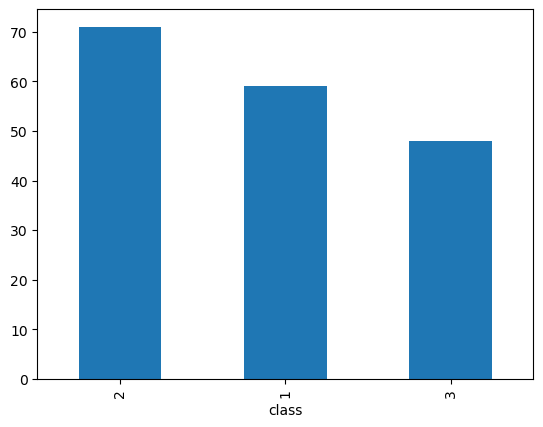

In [9]:
print(df['class'].value_counts(normalize=True))

df['class'].value_counts().plot(kind='bar');

  			Alcohol
---------------------------------------------------------------------------
Point Biseral Correlation Results 
Correlation:  -0.328  and  p-value:  7.723253314616425e-06
---------------------------------------------------------------------------
  class    count     mean       std    min     25%     50%     75%    max
-------  -------  -------  --------  -----  ------  ------  ------  -----
      1       59  13.7447  0.462125  12.85  13.4    13.75   14.1    14.83
      2       71  12.2787  0.537964  11.03  11.915  12.29   12.515  13.86
      3       48  13.1538  0.530241  12.2   12.805  13.165  13.505  14.34
---------------------------------------------------------------------------



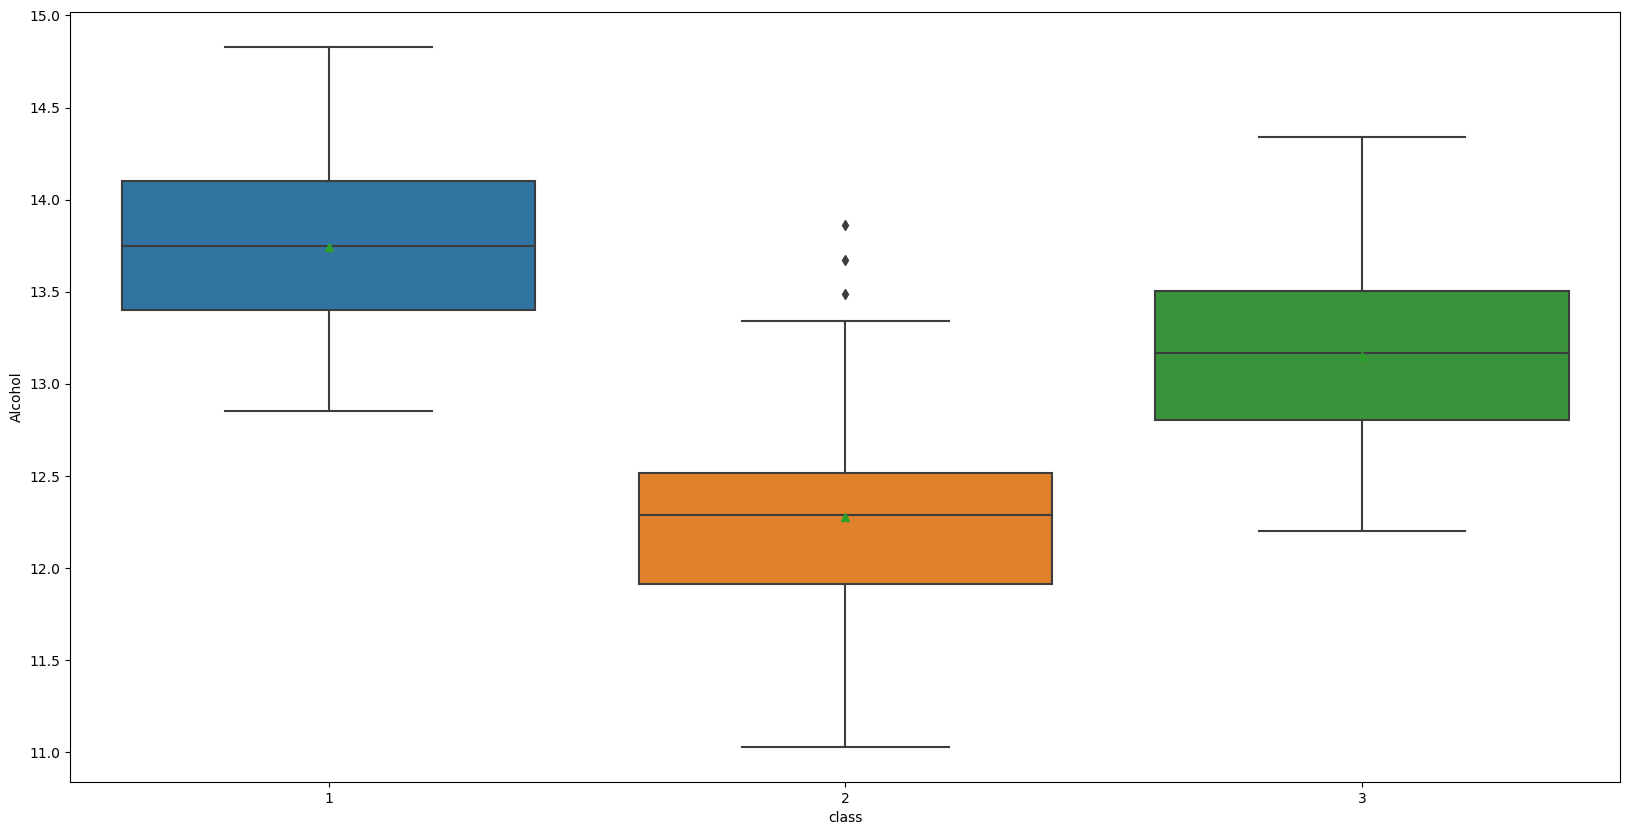

In [10]:
ypkf.numColumnInspector(df, col = "Alcohol")

In [ ]:
# Box plot aslında 25 ve 75 lik dereceleri gösteriyor, point bisseral correlation
# bu column ile target arasında nasıl bir korelasyon var ona bakıyor
# p değeride bu durumun gerçekten var olup olmadığına bakıyor, 0.05 ten büyük olanları aslında 
# non important diyebiliriz

In [ ]:
# Alcohol look pretty distinctive for different labels, but correlation

  			Malicacid
---------------------------------------------------------------------------
Point Biseral Correlation Results 
Correlation:  0.438  and  p-value:  9.91770325689775e-10
---------------------------------------------------------------------------
  class    count     mean       std    min     25%    50%     75%    max
-------  -------  -------  --------  -----  ------  -----  ------  -----
      1       59  2.01068  0.688549   1.35  1.665   1.77   1.935    4.04
      2       71  1.93268  1.01557    0.74  1.27    1.61   2.145    5.8
      3       48  3.33375  1.08791    1.24  2.5875  3.265  3.9575   5.65
---------------------------------------------------------------------------



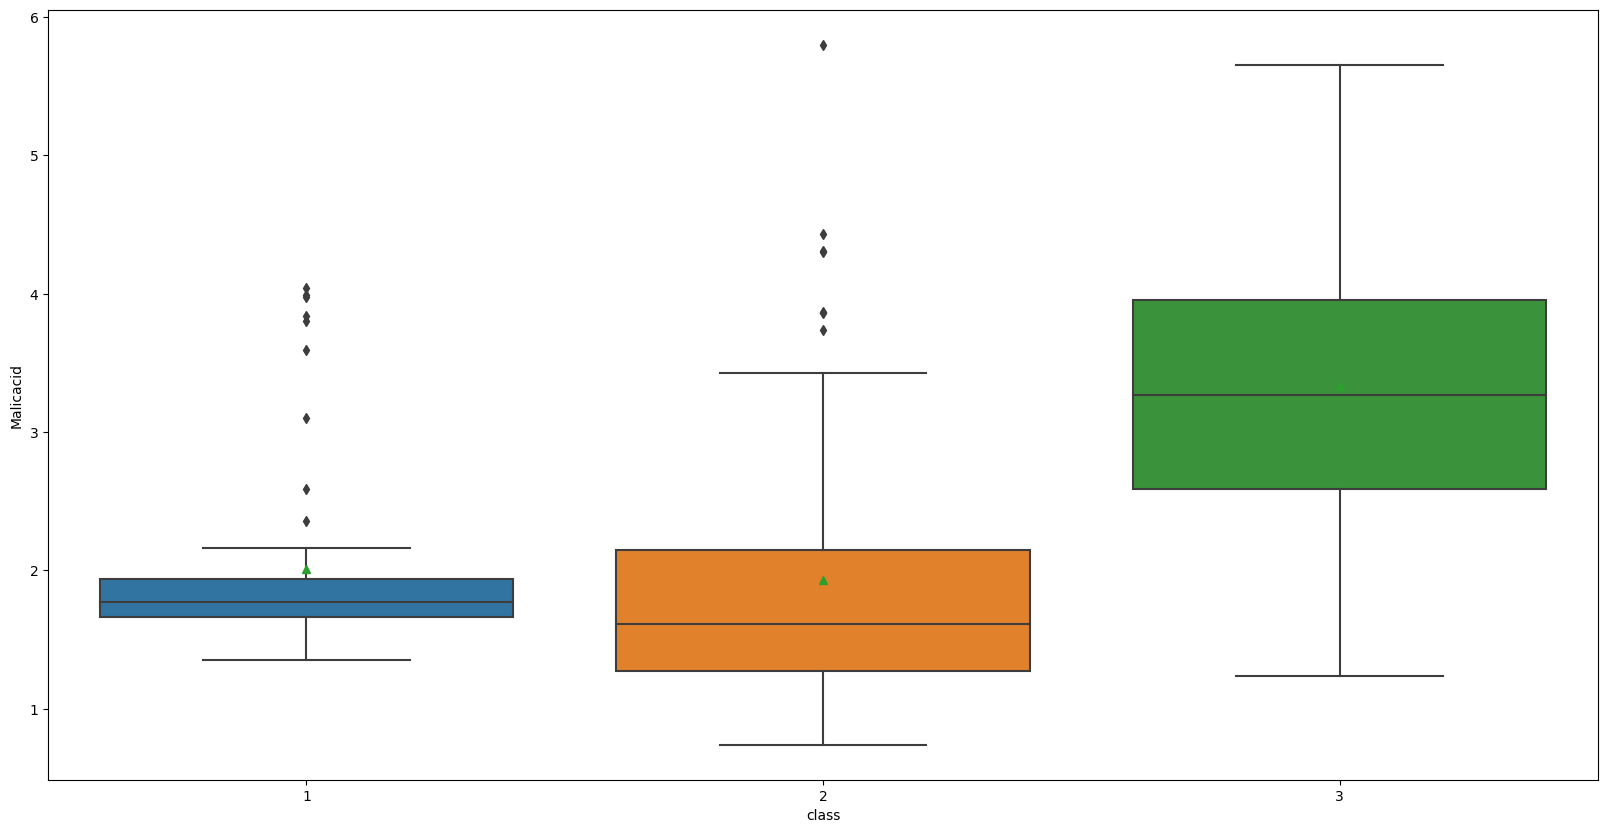

In [11]:
ypkf.numColumnInspector(df, col = "Malicacid")

In [ ]:
# 3. class have the highest malic acid, for class 1 malic acid levels are low and very narrow apart 
# from some outlier values

  			Ash
---------------------------------------------------------------------------
Point Biseral Correlation Results 
Correlation:  -0.05  and  p-value:  0.510497749646086
---------------------------------------------------------------------------
  class    count     mean       std    min    25%    50%     75%    max
-------  -------  -------  --------  -----  -----  -----  ------  -----
      1       59  2.45559  0.227166   2.04  2.295   2.44  2.615    3.22
      2       71  2.24479  0.315467   1.36  2       2.24  2.42     3.23
      3       48  2.43708  0.18469    2.1   2.3     2.38  2.6025   2.86
---------------------------------------------------------------------------



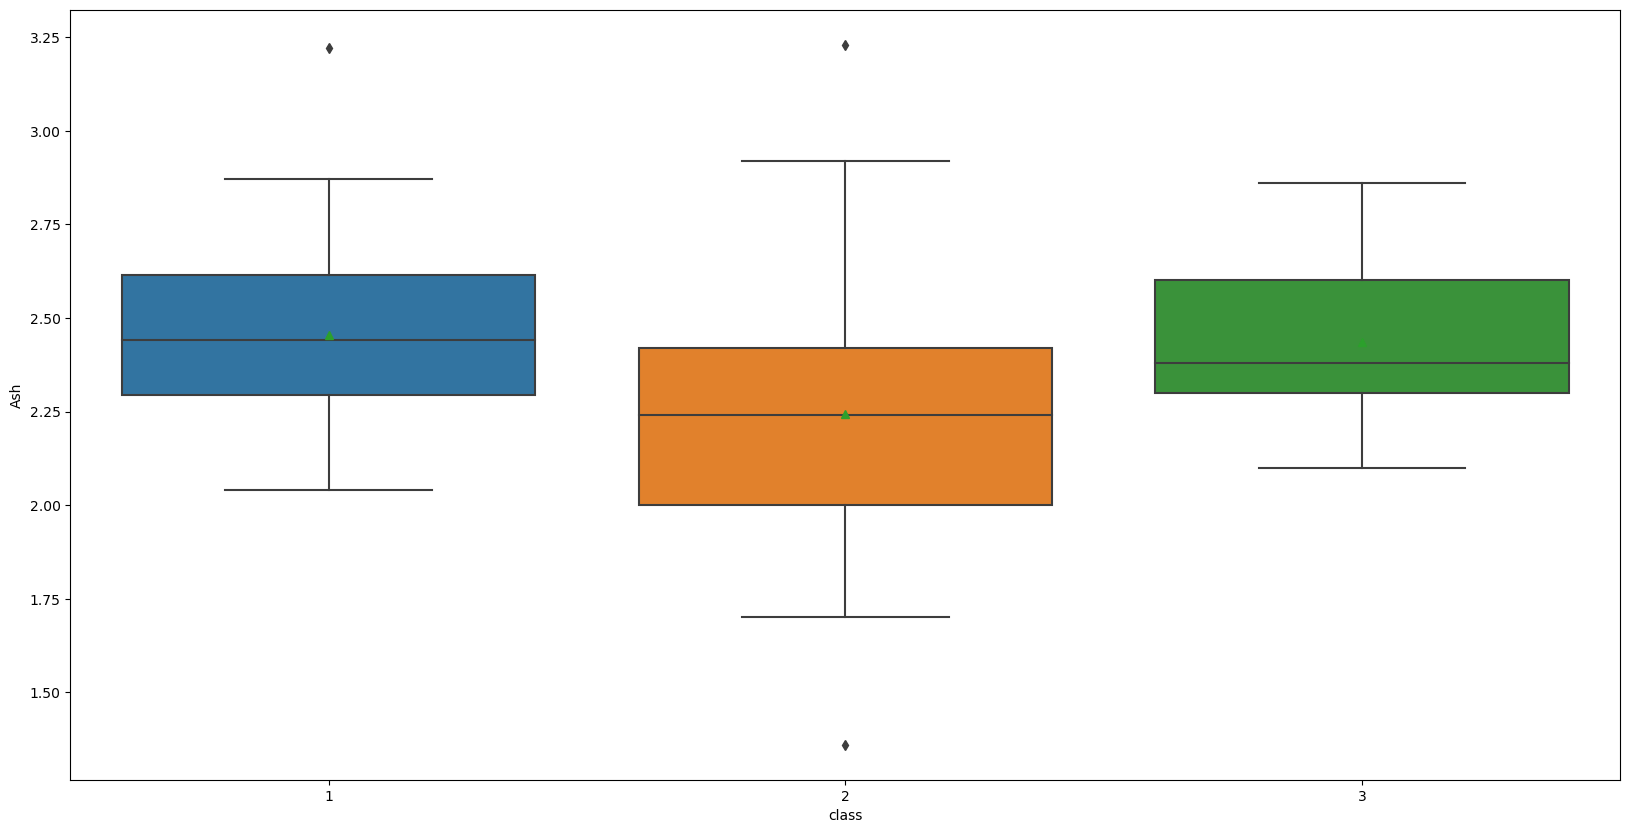

In [12]:
ypkf.numColumnInspector(df, col = "Ash")

In [ ]:
# Ash column doesn't look very different for each labels we have

  			Alcalinity_of_ash
---------------------------------------------------------------------------
Point Biseral Correlation Results 
Correlation:  0.518  and  p-value:  1.3353947853312198e-13
---------------------------------------------------------------------------
  class    count     mean      std    min    25%    50%    75%    max
-------  -------  -------  -------  -----  -----  -----  -----  -----
      1       59  17.0373  2.54632   11.2     16   16.8   18.7     25
      2       71  20.238   3.34977   10.6     18   20     22       30
      3       48  21.4167  2.25816   17.5     20   21     23       27
---------------------------------------------------------------------------



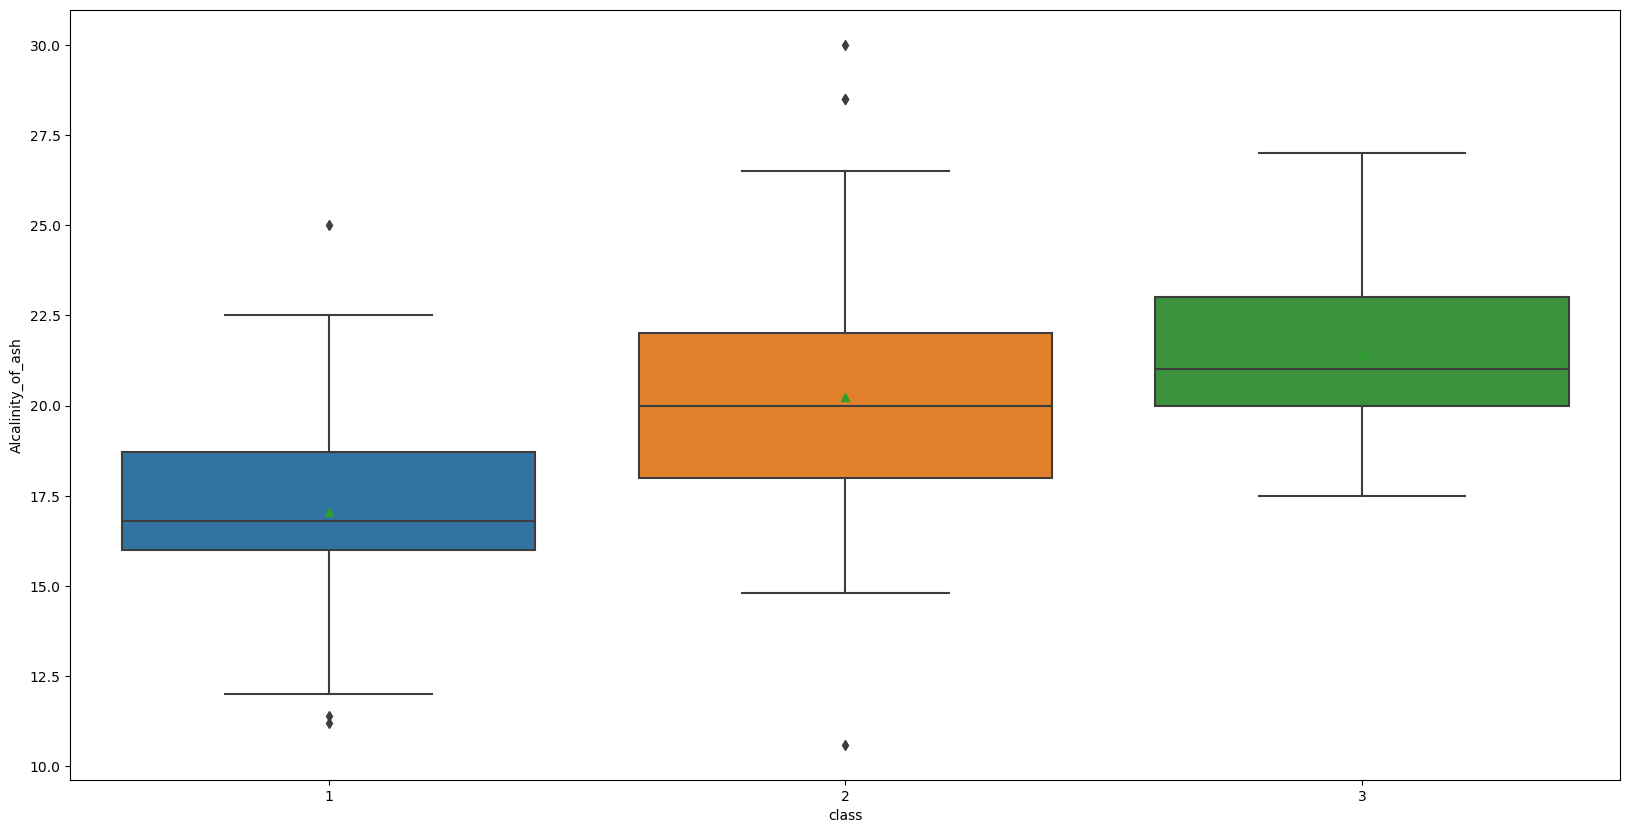

In [13]:
ypkf.numColumnInspector(df, col = "Alcalinity_of_ash")

In [ ]:
# Alcalinity in Ash doesn't look different for each labels

  			Magnesium
---------------------------------------------------------------------------
Point Biseral Correlation Results 
Correlation:  -0.209  and  p-value:  0.005075415772107246
---------------------------------------------------------------------------
  class    count      mean      std    min    25%    50%    75%    max
-------  -------  --------  -------  -----  -----  -----  -----  -----
      1       59  106.339   10.4989     89  98       104  114      132
      2       71   94.5493  16.7535     70  85.5      88   99.5    162
      3       48   99.3125  10.8905     80  89.75     97  106      123
---------------------------------------------------------------------------



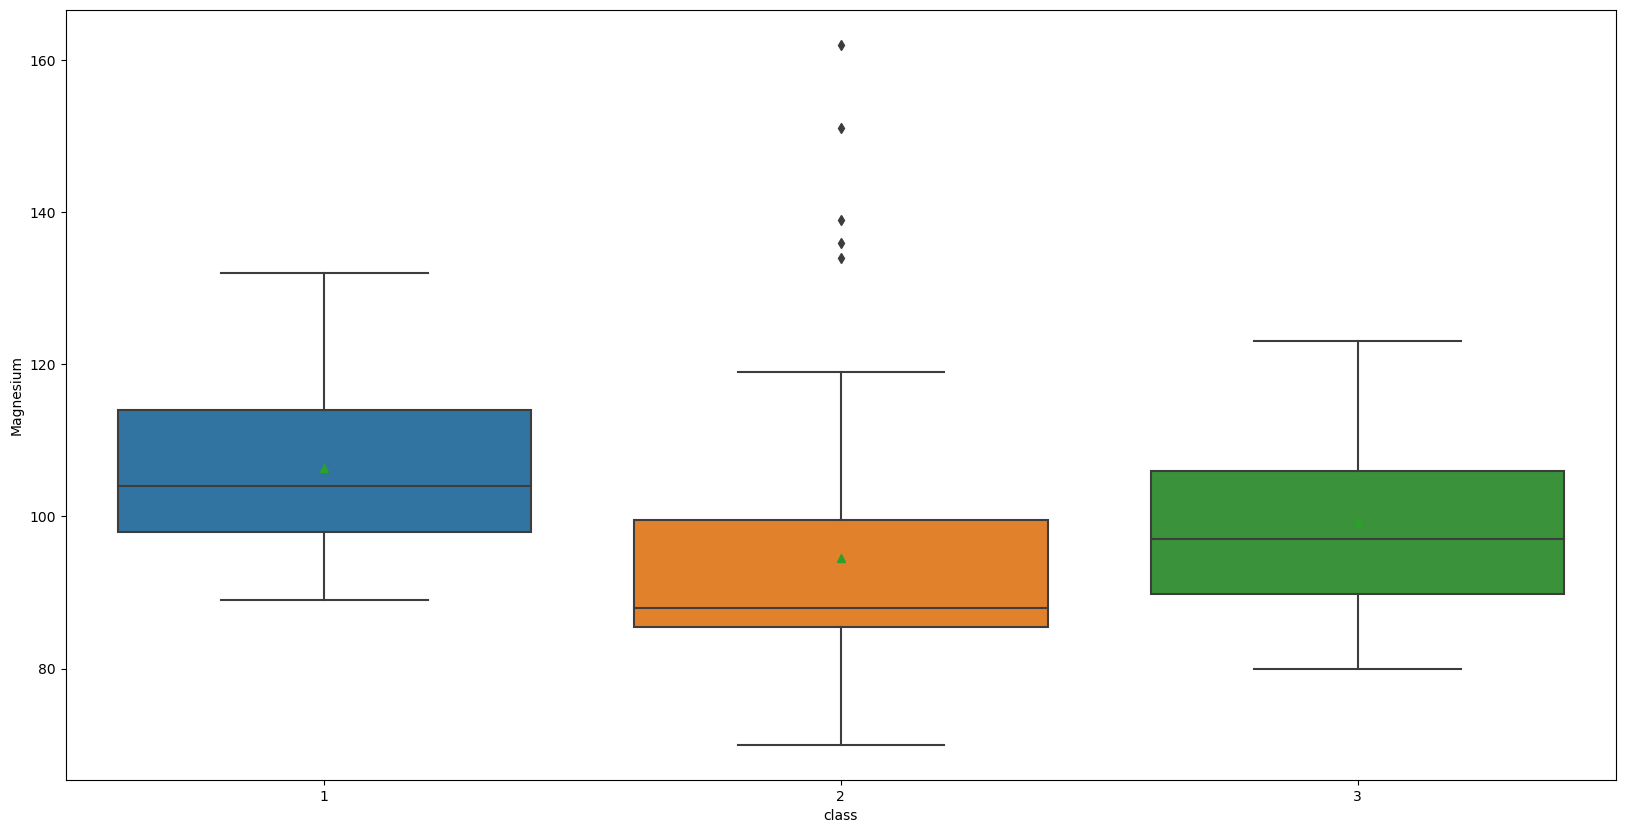

In [14]:
ypkf.numColumnInspector(df, col = "Magnesium")

In [ ]:
# Label 1 has highest Magnesium levels

  			Total_phenols
---------------------------------------------------------------------------
Point Biseral Correlation Results 
Correlation:  -0.719  and  p-value:  1.2340511416927314e-29
---------------------------------------------------------------------------
  class    count     mean       std    min     25%    50%     75%    max
-------  -------  -------  --------  -----  ------  -----  ------  -----
      1       59  2.84017  0.338961   2.2   2.6     2.8    3        3.88
      2       71  2.25887  0.545361   1.1   1.895   2.2    2.56     3.52
      3       48  1.67875  0.356971   0.98  1.4075  1.635  1.8075   2.8
---------------------------------------------------------------------------



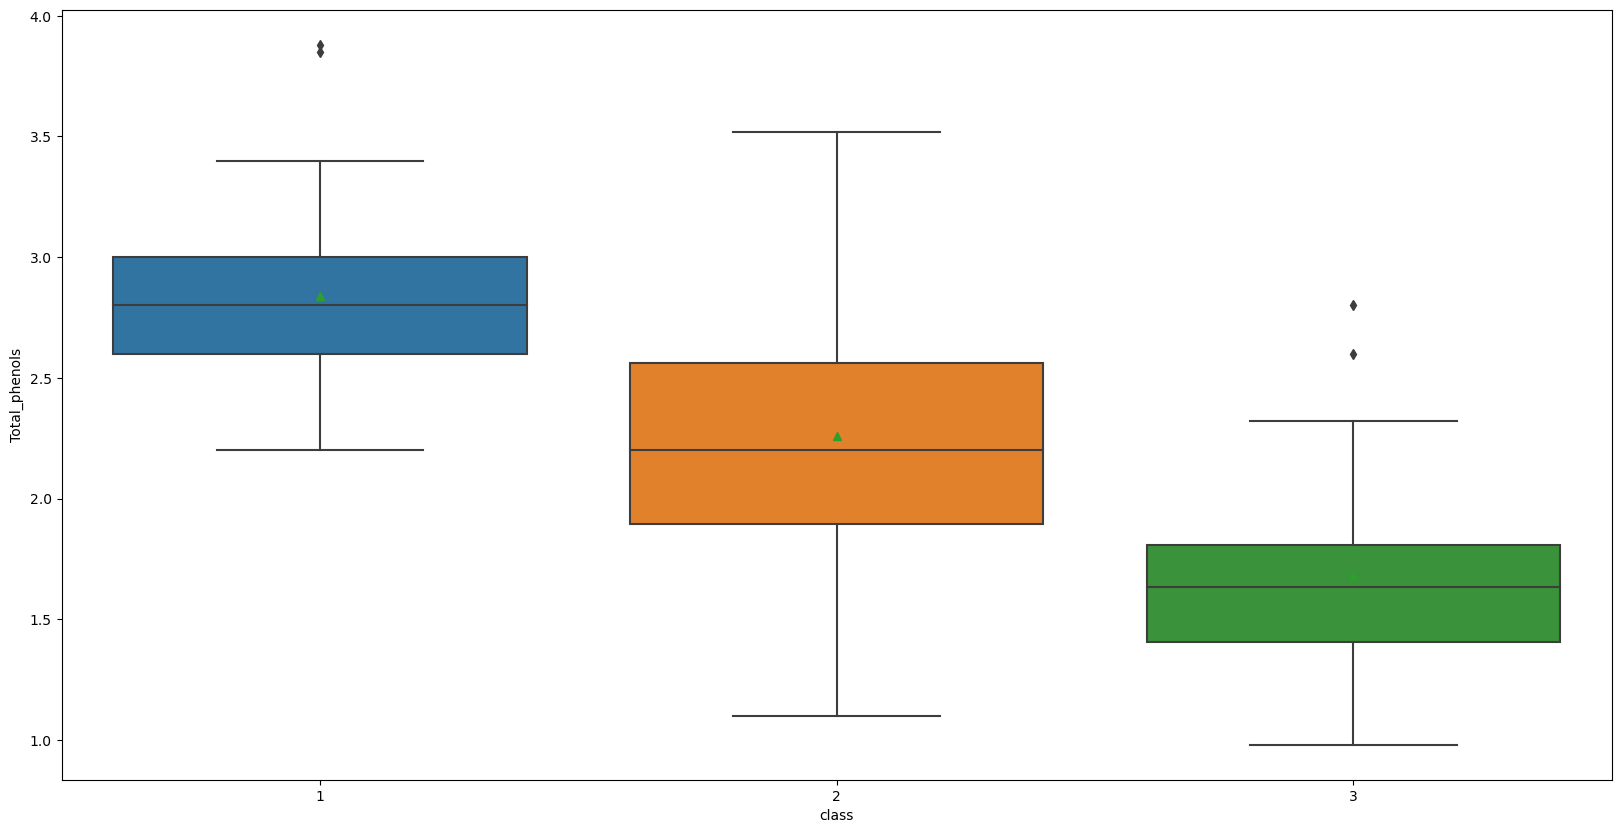

In [15]:
ypkf.numColumnInspector(df, col = "Total_phenols")

In [ ]:
# Class 1 has the highest Total_phenols level, Total_phenols is a distinctive

  			Flavanoids
---------------------------------------------------------------------------
Point Biseral Correlation Results 
Correlation:  -0.847  and  p-value:  2.736652261700515e-50
---------------------------------------------------------------------------
  class    count      mean       std    min    25%    50%    75%    max
-------  -------  --------  --------  -----  -----  -----  -----  -----
      1       59  2.98237   0.397494   2.19  2.68   2.98   3.245   3.93
      2       71  2.08085   0.705701   0.57  1.605  2.03   2.475   5.08
      3       48  0.781458  0.293504   0.34  0.58   0.685  0.92    1.57
---------------------------------------------------------------------------



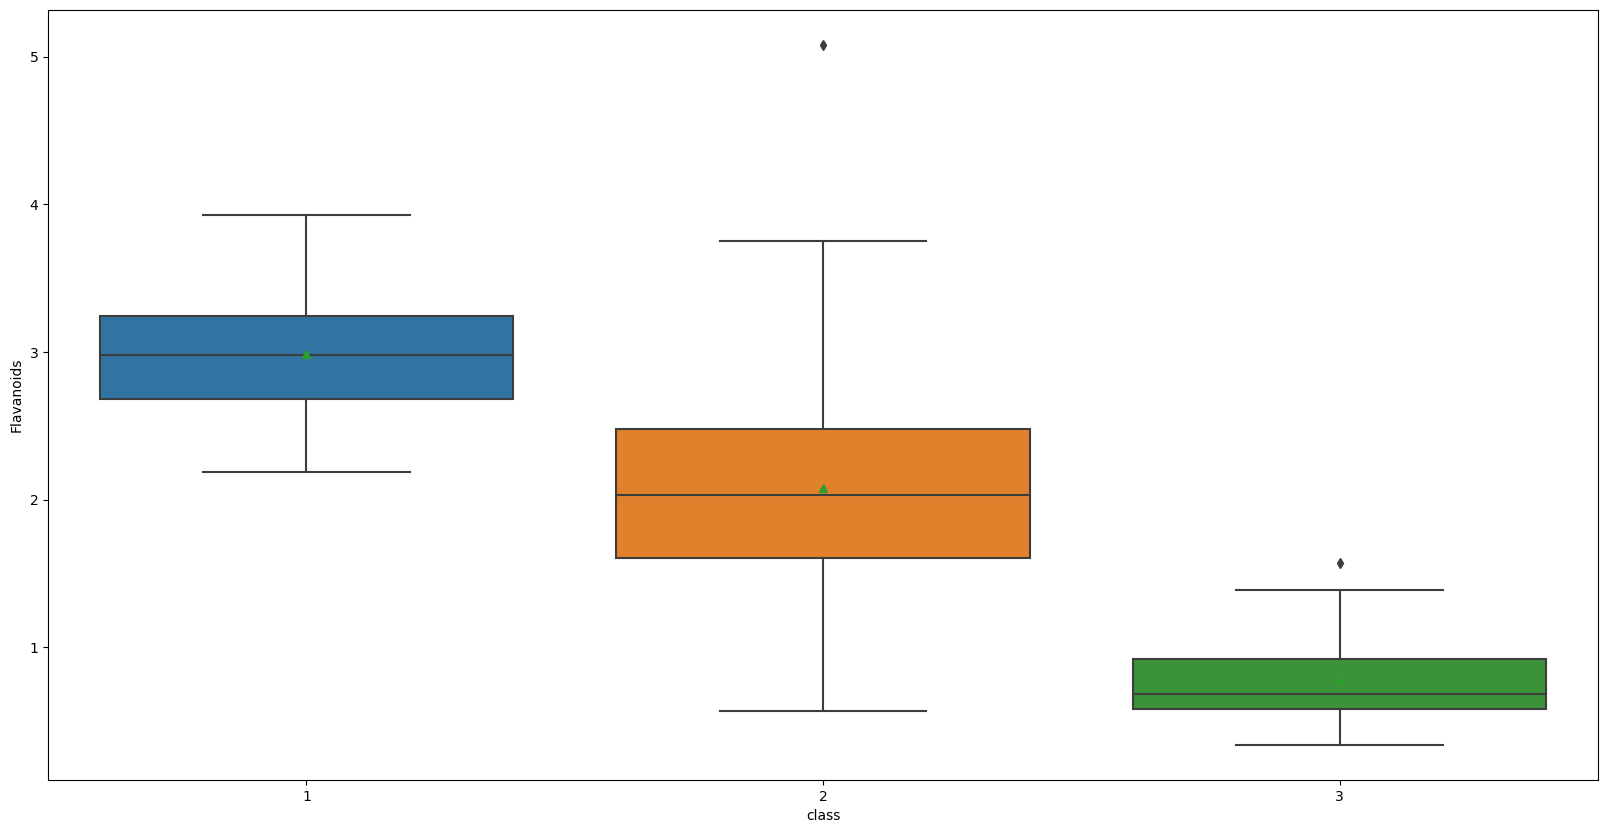

In [16]:
ypkf.numColumnInspector(df, col = "Flavanoids")

In [ ]:
# Flavanoids is very distinctive feature for each label

  			Nonflavanoid_phenols
---------------------------------------------------------------------------
Point Biseral Correlation Results 
Correlation:  0.489  and  p-value:  4.2867390397642016e-12
---------------------------------------------------------------------------
  class    count      mean        std    min     25%    50%    75%    max
-------  -------  --------  ---------  -----  ------  -----  -----  -----
      1       59  0.29      0.0700492   0.17  0.255    0.29   0.32   0.5
      2       71  0.363662  0.123961    0.13  0.27     0.37   0.43   0.66
      3       48  0.4475    0.12414     0.17  0.3975   0.47   0.53   0.63
---------------------------------------------------------------------------



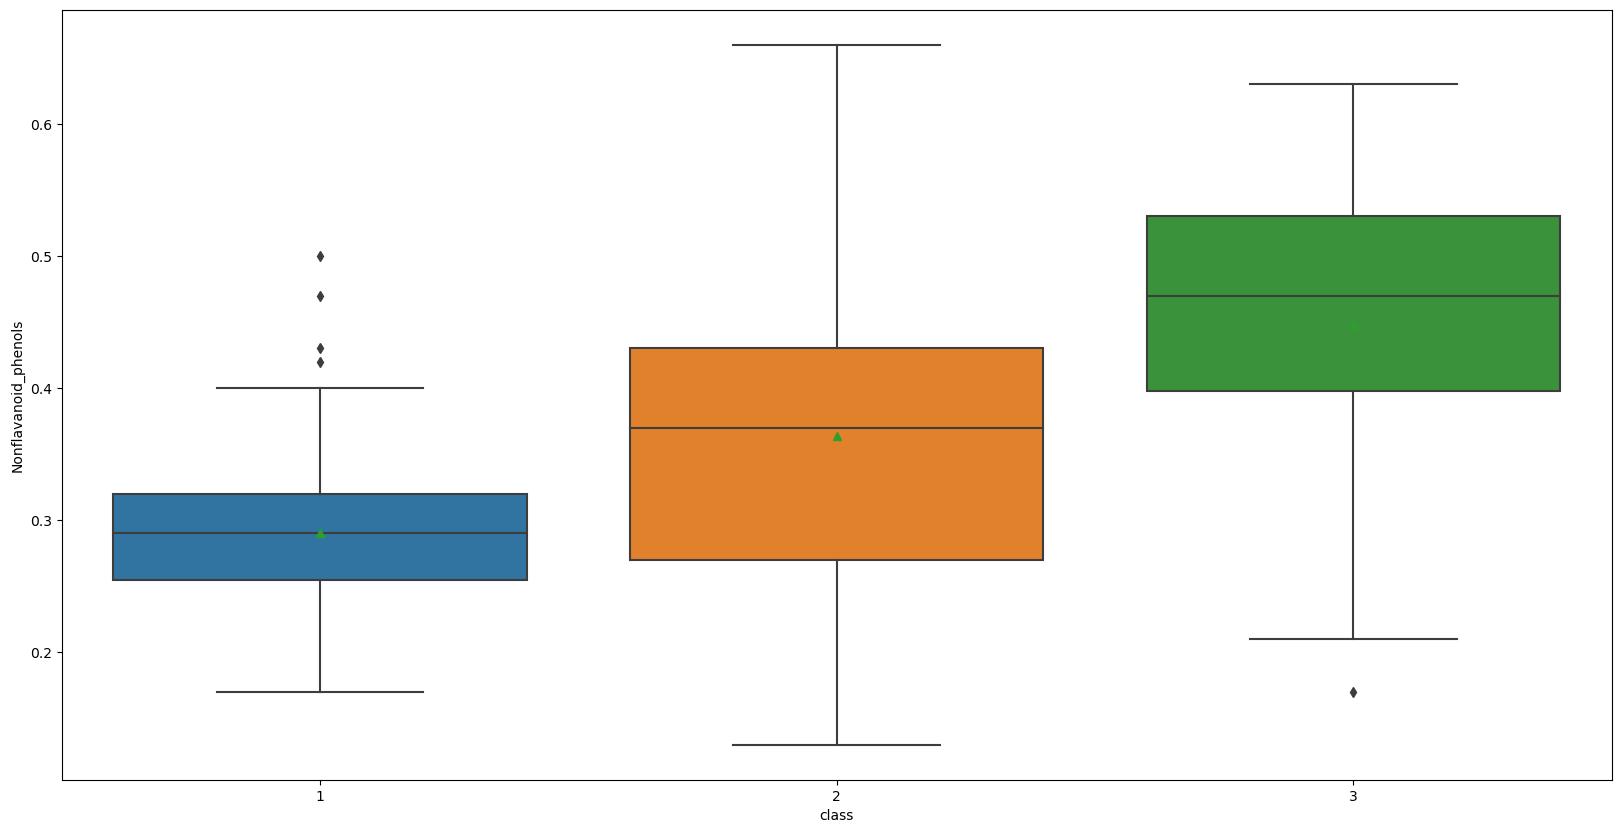

In [17]:
ypkf.numColumnInspector(df, col = "Nonflavanoid_phenols")

In [ ]:
# Nonflavanoid_phenols look opposite than the Flavanoids

  			Proanthocyanins
---------------------------------------------------------------------------
Point Biseral Correlation Results 
Correlation:  -0.499  and  p-value:  1.3272509181442634e-12
---------------------------------------------------------------------------
  class    count     mean       std    min    25%    50%    75%    max
-------  -------  -------  --------  -----  -----  -----  -----  -----
      1       59  1.89932  0.412109   1.25  1.64   1.87   2.09    2.96
      2       71  1.63028  0.602068   0.41  1.35   1.61   1.885   3.58
      3       48  1.15354  0.408836   0.55  0.855  1.105  1.35    2.7
---------------------------------------------------------------------------



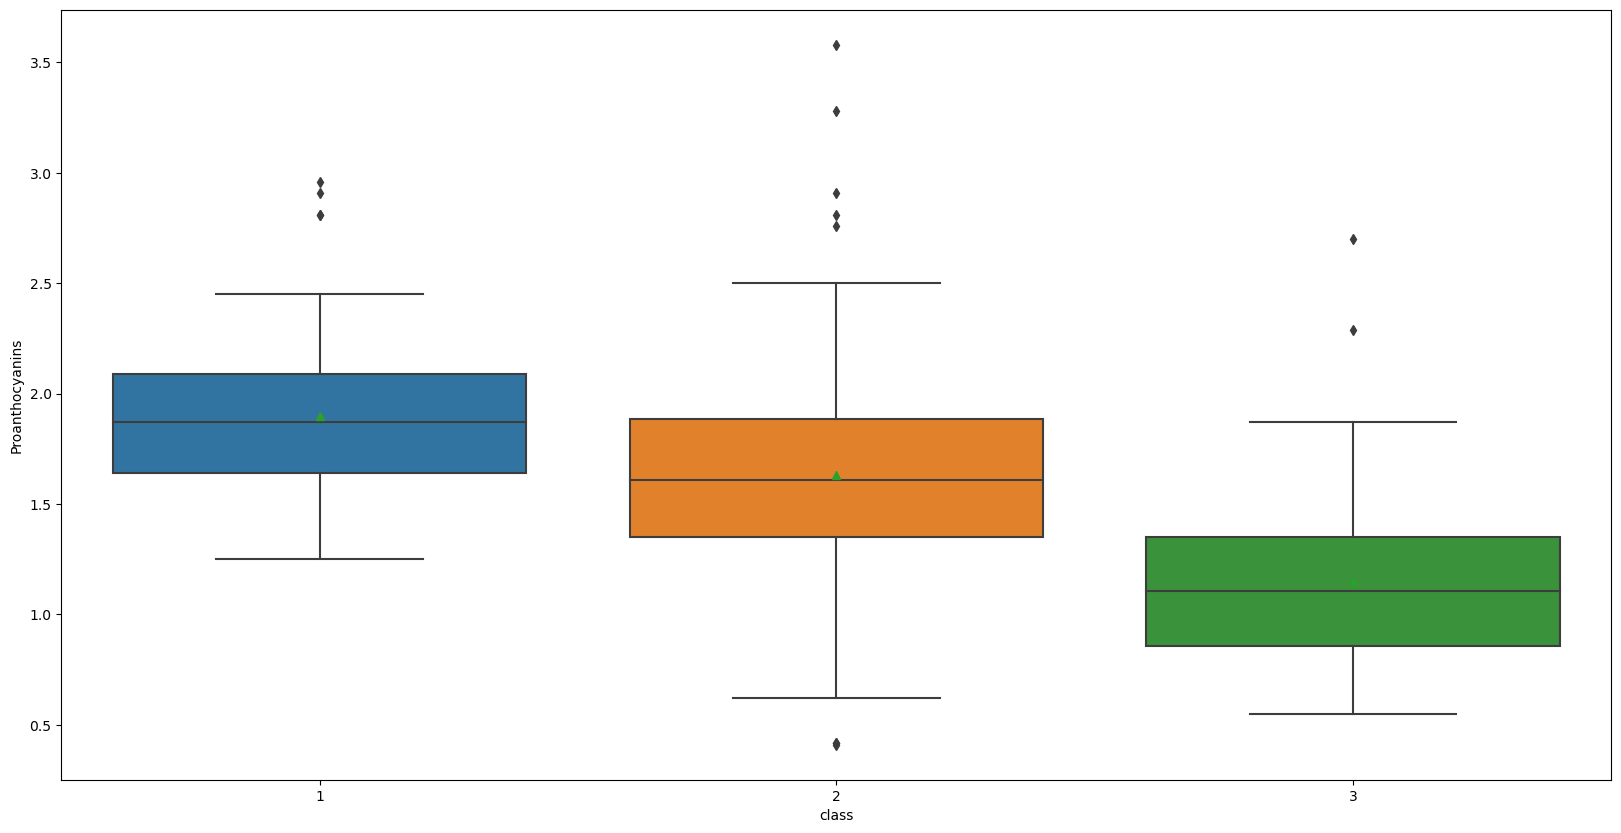

In [18]:
ypkf.numColumnInspector(df, col = "Proanthocyanins")

In [19]:
# Proanthocyanins show somewhat distinctive characteristic

  			Color_intensity
---------------------------------------------------------------------------
Point Biseral Correlation Results 
Correlation:  0.266  and  p-value:  0.0003382416493269153
---------------------------------------------------------------------------
  class    count     mean       std    min     25%    50%    75%    max
-------  -------  -------  --------  -----  ------  -----  -----  -----
      1       59  5.52831  1.23857    3.52  4.55     5.4   6.225    8.9
      2       71  3.08662  0.924929   1.28  2.535    2.9   3.4      6
      3       48  7.39625  2.31094    3.85  5.4375   7.55  9.225   13
---------------------------------------------------------------------------



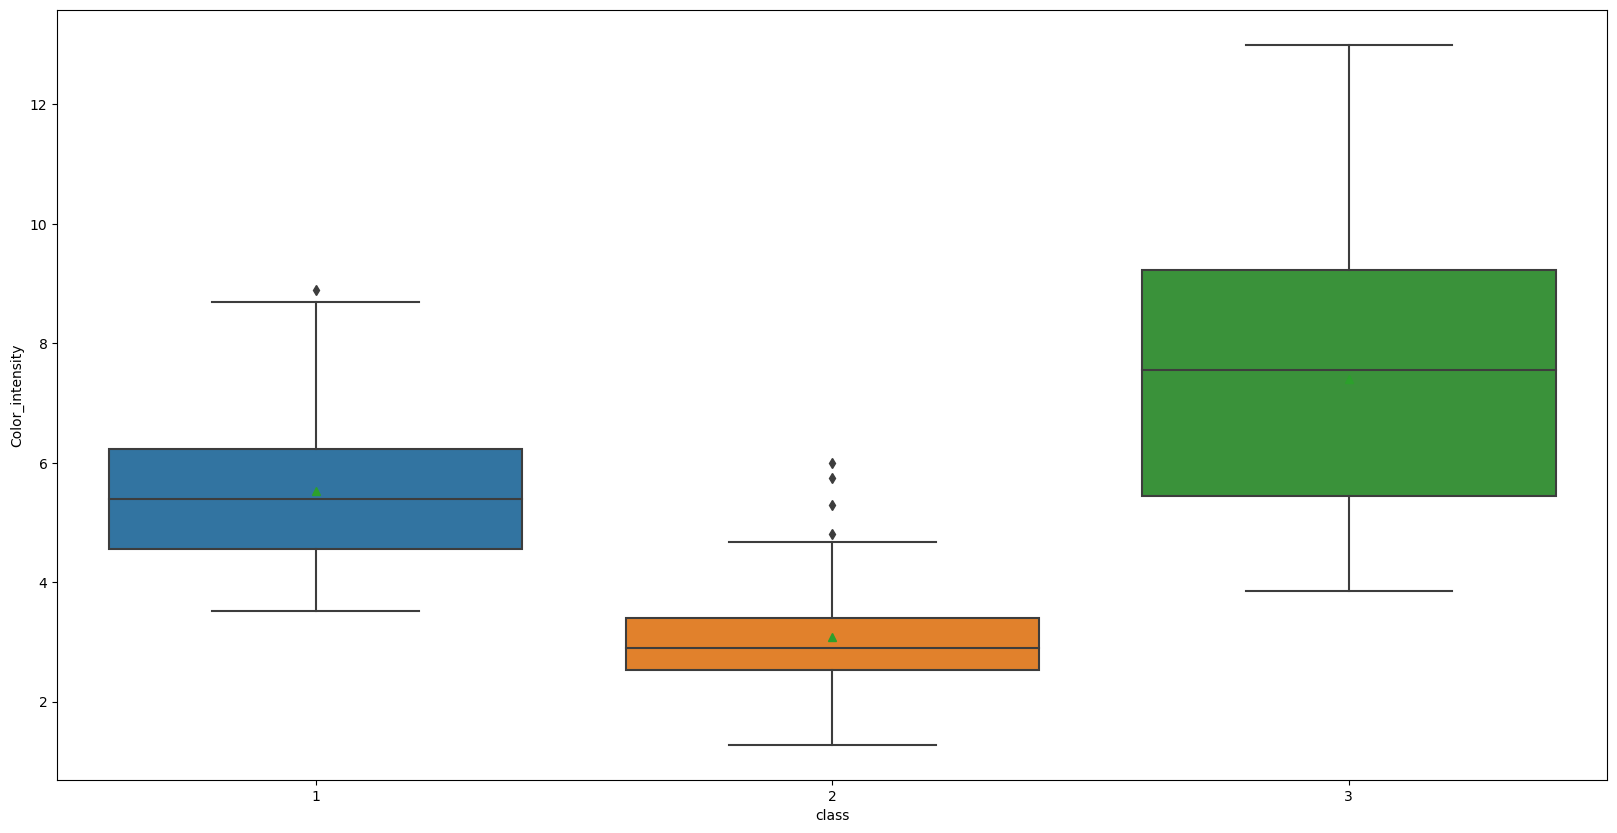

In [20]:
ypkf.numColumnInspector(df, col = "Color_intensity")

In [21]:
# Color_intensity is pretty discriminative feature

  			Hue
---------------------------------------------------------------------------
Point Biseral Correlation Results 
Correlation:  -0.617  and  p-value:  4.4053994633824726e-20
---------------------------------------------------------------------------
  class    count      mean       std    min     25%    50%     75%    max
-------  -------  --------  --------  -----  ------  -----  ------  -----
      1       59  1.06203   0.116483   0.82  0.995   1.07   1.13     1.28
      2       71  1.05628   0.202937   0.69  0.925   1.04   1.205    1.71
      3       48  0.682708  0.114441   0.48  0.5875  0.665  0.7525   0.96
---------------------------------------------------------------------------



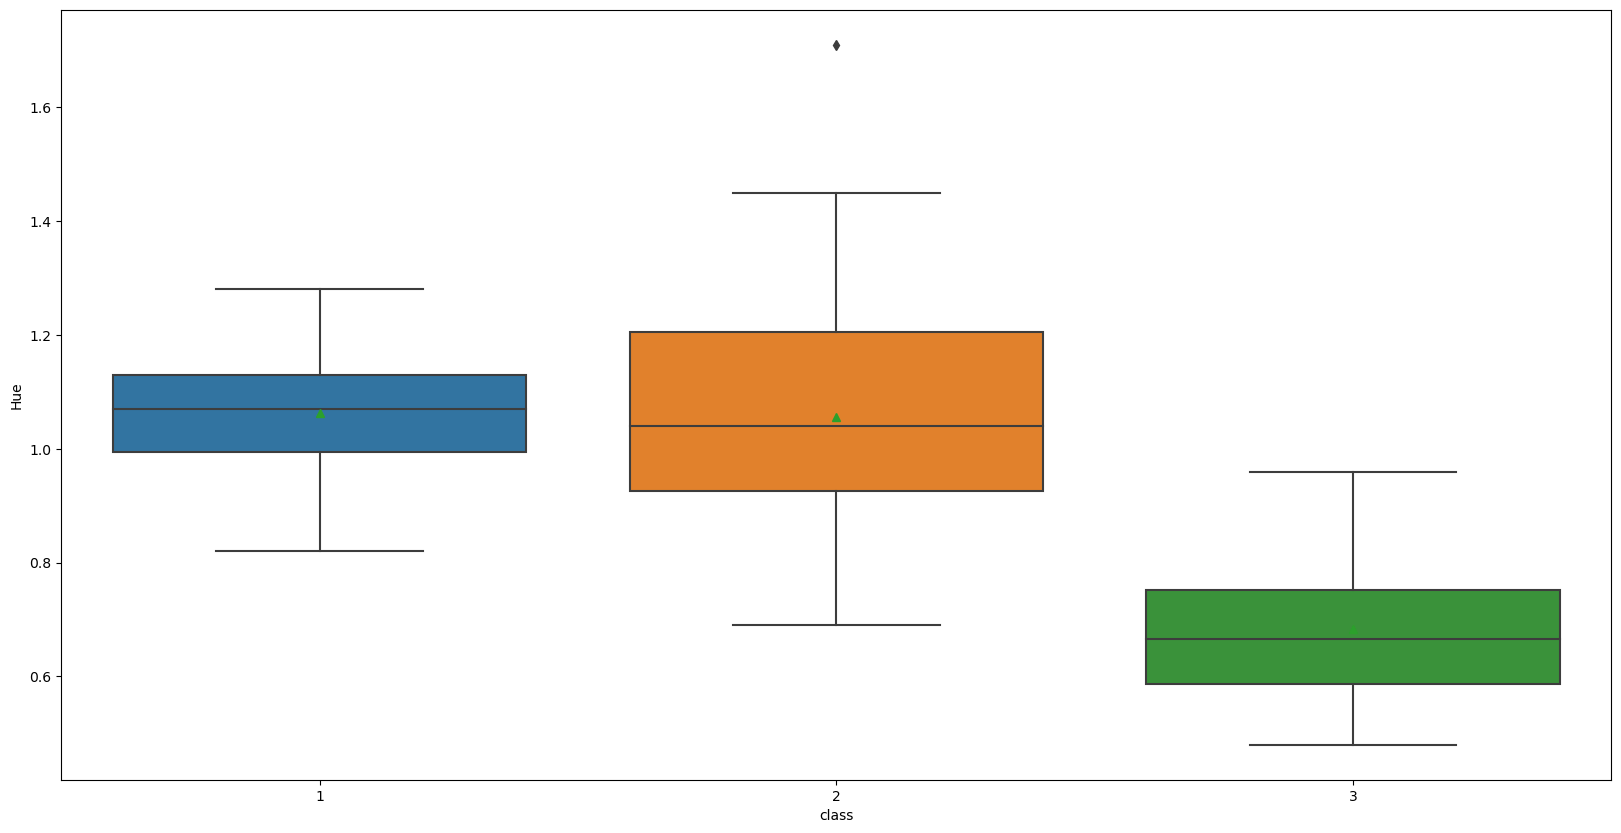

In [22]:
ypkf.numColumnInspector(df, col = "Hue")

  			0D280_0D315_of_diluted_wines
---------------------------------------------------------------------------
Point Biseral Correlation Results 
Correlation:  -0.788  and  p-value:  5.886163581954798e-39
---------------------------------------------------------------------------
  class    count     mean       std    min    25%    50%    75%    max
-------  -------  -------  --------  -----  -----  -----  -----  -----
      1       59  3.1578   0.357077   2.51   2.87   3.17   3.42   4
      2       71  2.78535  0.496573   1.59   2.44   2.83   3.16   3.69
      3       48  1.68354  0.272111   1.27   1.51   1.66   1.82   2.47
---------------------------------------------------------------------------



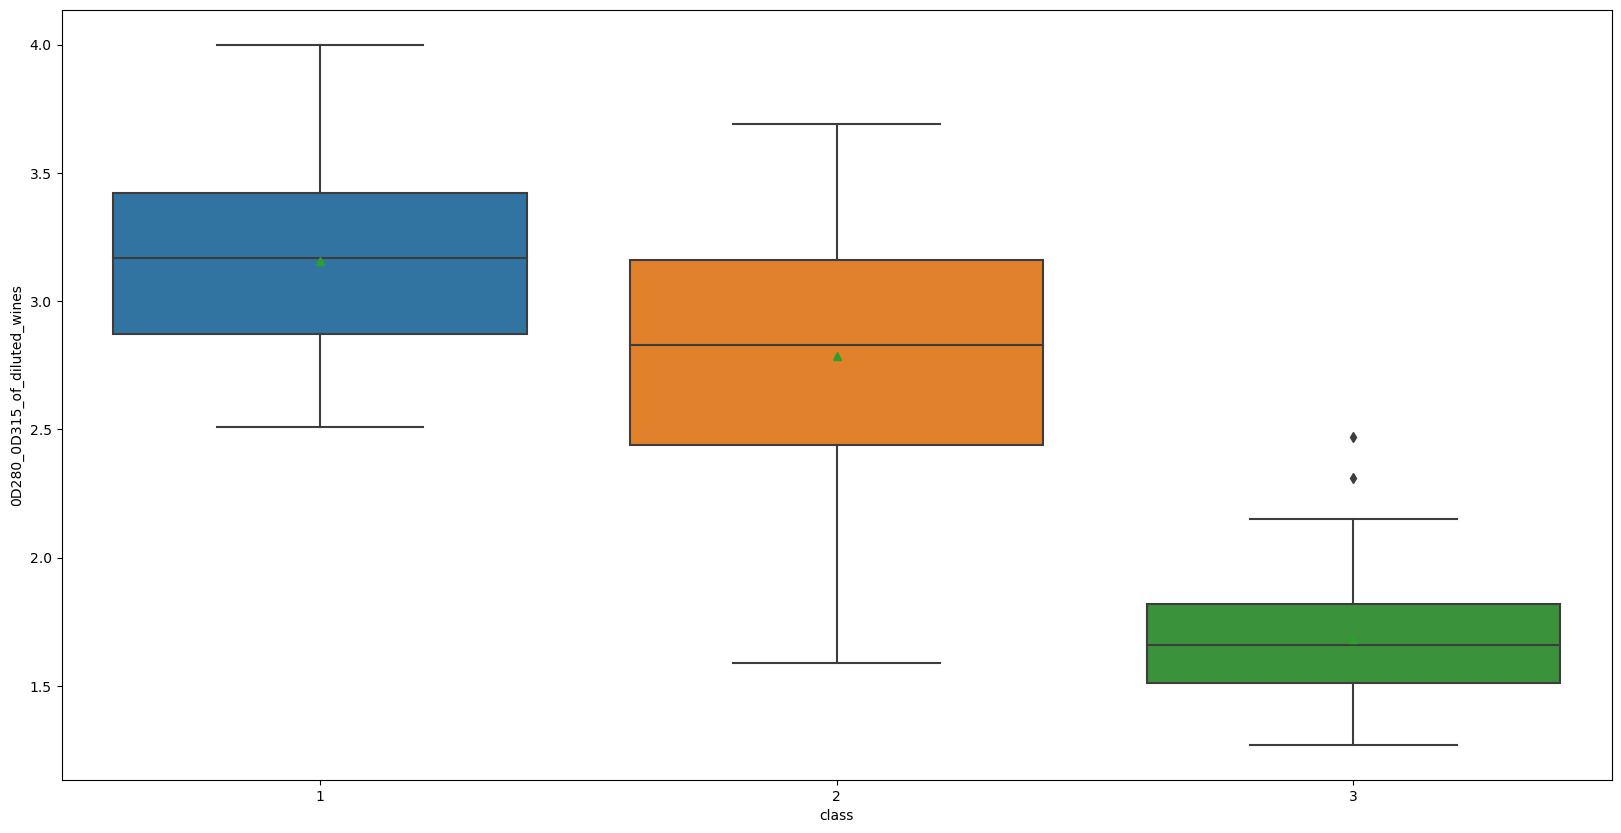

In [23]:
ypkf.numColumnInspector(df, col = "0D280_0D315_of_diluted_wines")

In [ ]:
# label 3 is very low 0D280_0D315_of_diluted_wines levels

  			Proline
---------------------------------------------------------------------------
Point Biseral Correlation Results 
Correlation:  -0.634  and  p-value:  2.231319169403664e-21
---------------------------------------------------------------------------
  class    count      mean      std    min    25%     50%    75%    max
-------  -------  --------  -------  -----  -----  ------  -----  -----
      1       59  1115.71   221.521    680  987.5  1095     1280   1680
      2       71   519.507  157.211    278  406.5   495      625    985
      3       48   629.896  115.097    415  545     627.5    695    880
---------------------------------------------------------------------------



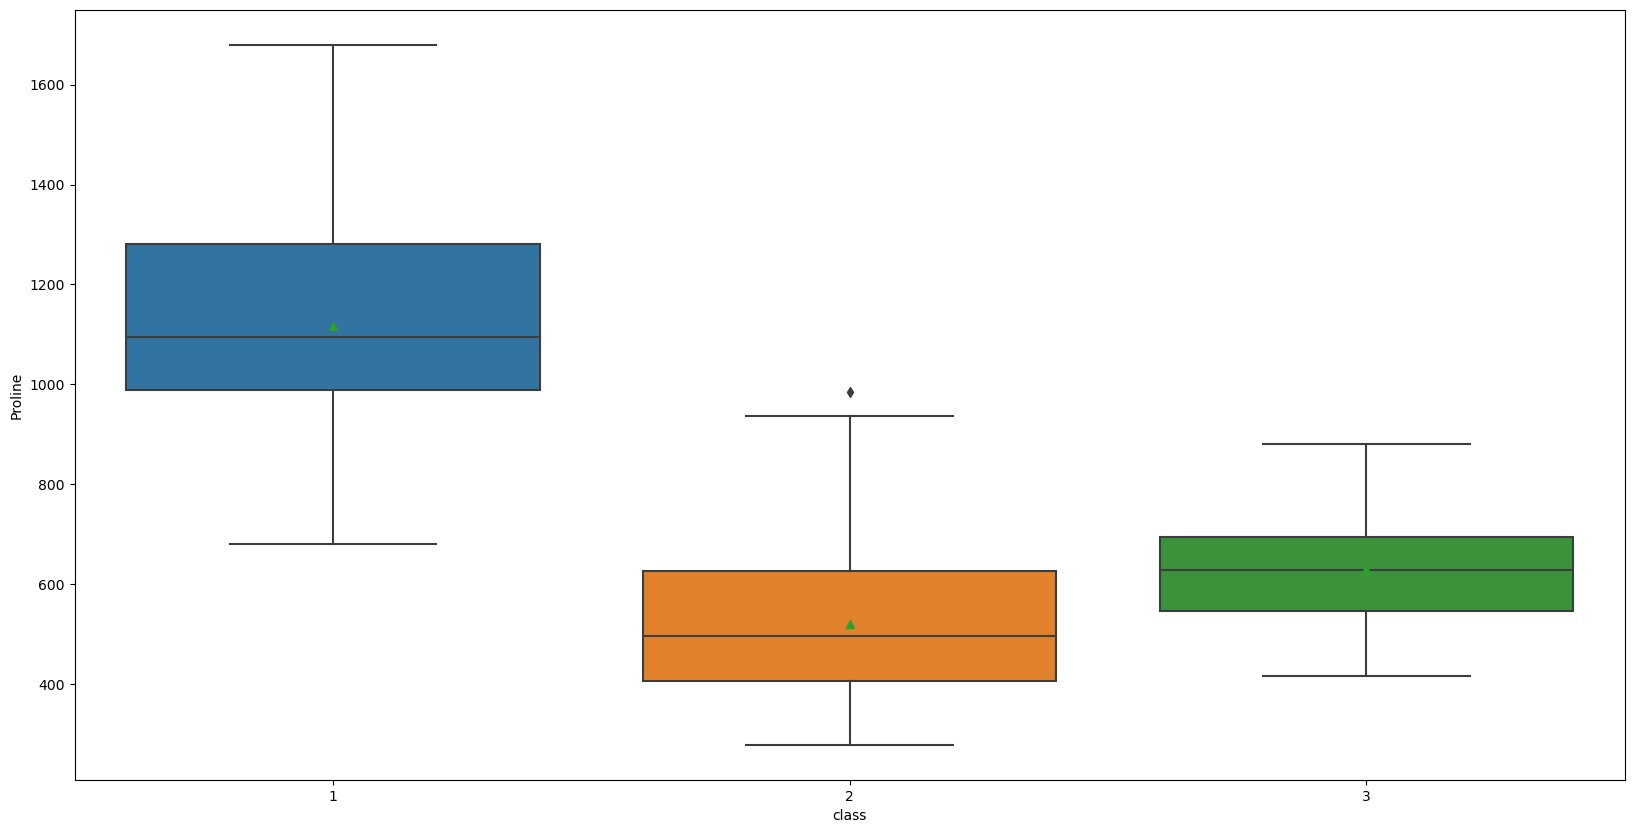

In [24]:
ypkf.numColumnInspector(df, col = "Proline")

In [53]:
# Giving the stratify parameter here so our target proportion will stay same
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1].tolist()], df["class"], \
                                                    stratify = df["class"], test_size=.3, random_state =42)

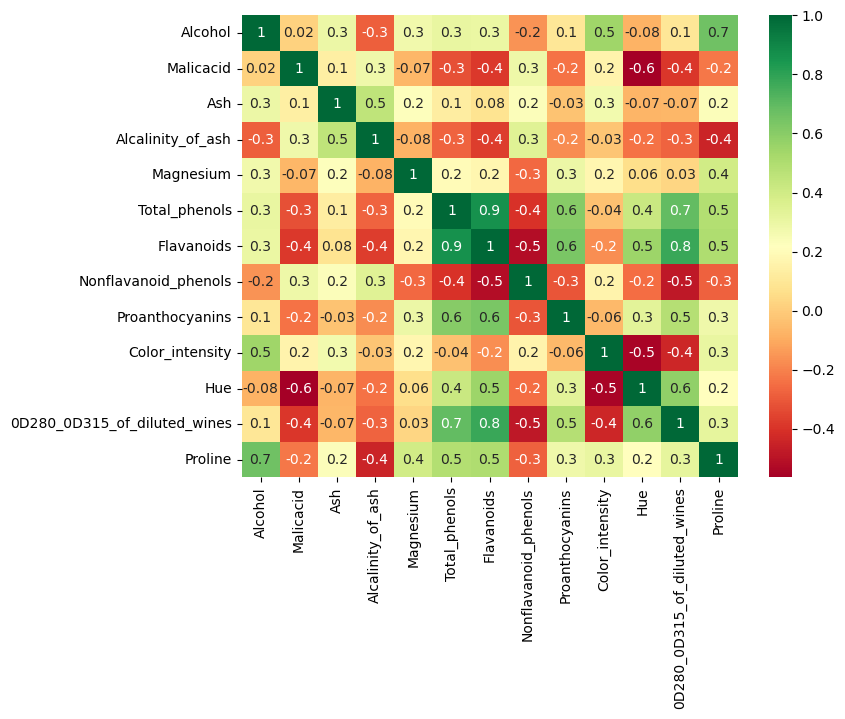

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(X_train.corr(), annot = True, fmt='.1g',cmap='RdYlGn')
plt.show()

In [27]:
cor_matrix = X_train.corr()
keep = np.triu(np.ones(cor_matrix.shape)).astype('bool').reshape(cor_matrix.size)
corrs = pd.DataFrame(cor_matrix.stack(dropna=False)[keep],columns = ['correlation']).reset_index()
corrs = corrs[corrs.level_0 != corrs.level_1]
corrs['correlation_abs'] = abs(corrs.correlation)
corrs = corrs.sort_values(by = 'correlation_abs',ascending=False)[['level_0','level_1','correlation']]
corrs.head(10)

,level_0,level_1,correlation
56,Total_phenols,Flavanoids,0.86
68,Flavanoids,0D280_0D315_of_diluted_wines,0.77
61,Total_phenols,0D280_0D315_of_diluted_wines,0.69
12,Alcohol,Proline,0.66
65,Flavanoids,Proanthocyanins,0.64
58,Total_phenols,Proanthocyanins,0.60
86,Hue,0D280_0D315_of_diluted_wines,0.58
22,Malicacid,Hue,-0.57
67,Flavanoids,Hue,0.55
82,Color_intensity,Hue,-0.55


In [28]:
# Since correlation plot only checks for linear correlation we have to check for non-linear correlation too
# Some numeric columns can be correlated non-linearly, it can be quadratic

# Regular correlation tells if one column values are increasing other should be or the other way around

def calculate_nonlinear_correlations(df):
    num_cols = df.select_dtypes(include='number').columns

    mi = pd.DataFrame(columns=num_cols, index=num_cols)
    for col1 in num_cols:
        for col2 in num_cols:
            mi.loc[col1, col2] = mutual_info_regression(df[col1].values.reshape(-1, 1), df[col2])[0]

    mi = mi.astype(float)

    dc = pd.DataFrame(columns=num_cols, index=num_cols)
    for col1 in num_cols:
        for col2 in num_cols:
            dc.loc[col1, col2] = dcor.distance_correlation(df[col1], df[col2])

    dc = dc.astype(float)

    return mi, dc 


mi, dc = calculate_nonlinear_correlations(X_train) 

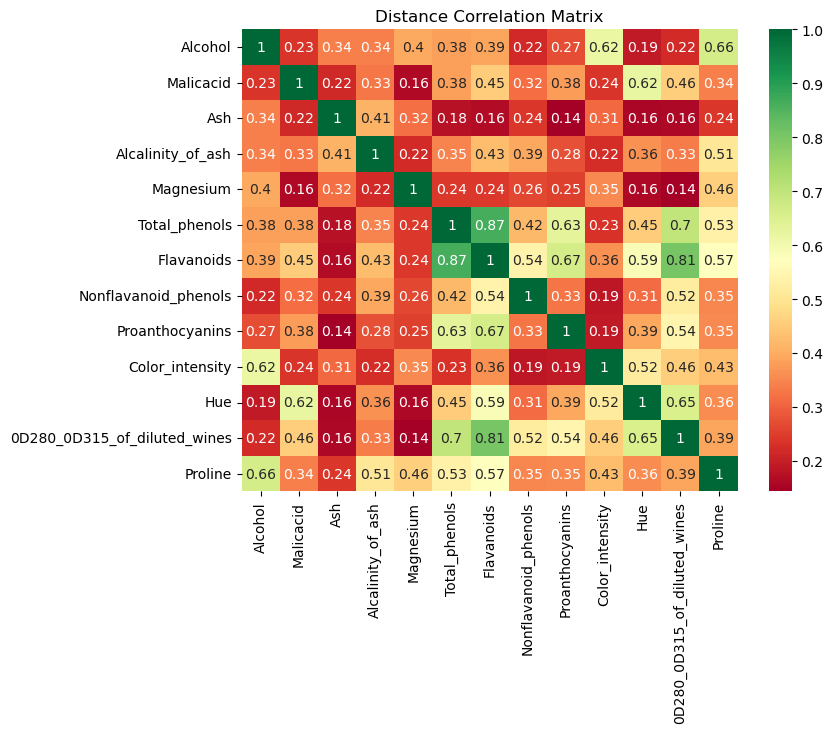

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(dc, cmap='RdYlGn', annot=True) 
plt.title('Distance Correlation Matrix')
plt.show()

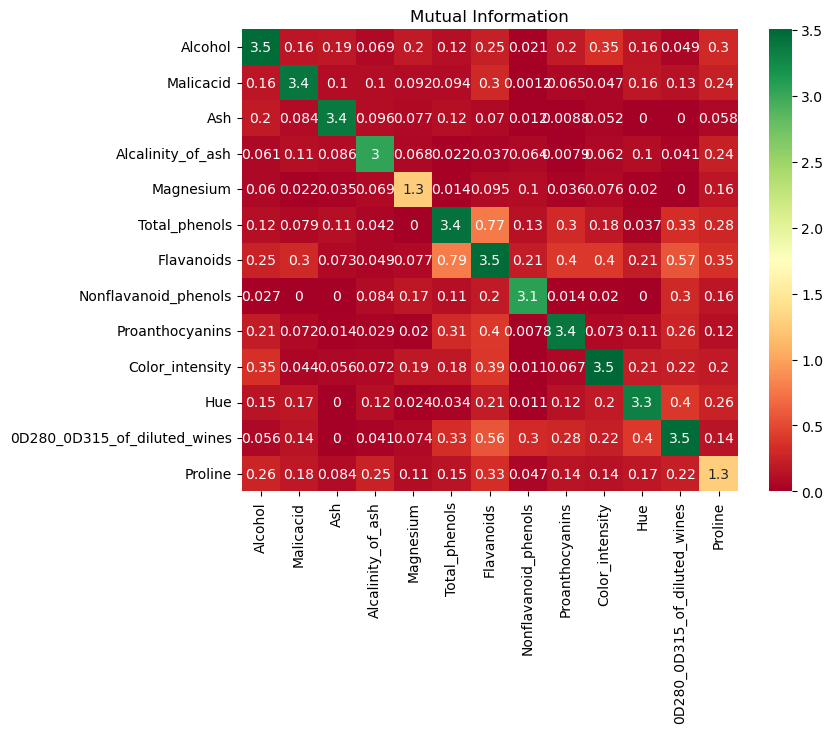

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(mi, annot=True, cmap='RdYlGn')
plt.title("Mutual Information")
plt.show()

In [63]:
# Just checking explained variance with PCA 
pca = PCA(n_components=1)

pca.fit(df[features])

explained_variance_ratio = pca.explained_variance_ratio_[0]

print("Total variance explained:", explained_variance_ratio)

Total variance explained: 0.9980912304918974


In [31]:
features = X_train.columns.tolist()
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(transformers=[('num', num_transformer, features)], remainder='passthrough')

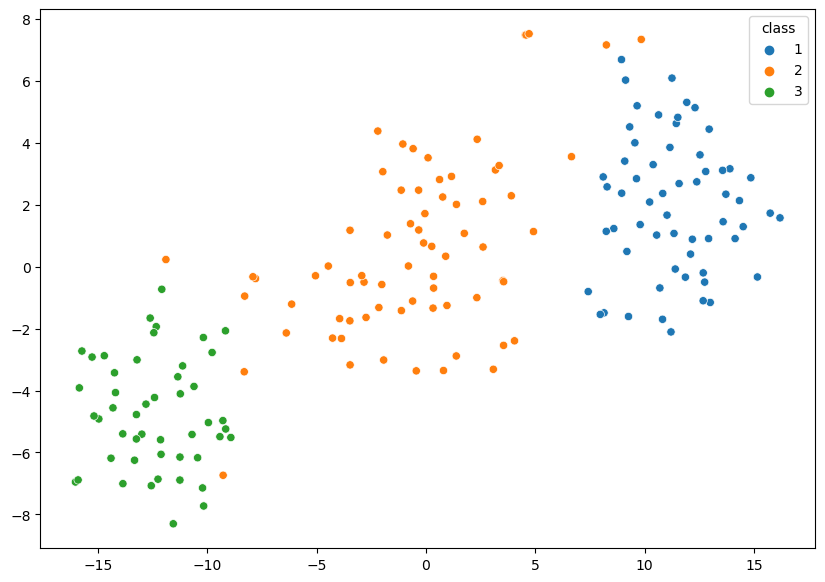

In [32]:
# This pipeline is showing of our data's trajectory to the 2 dimensional space 

pipe_tsne = Pipeline([
    ("preprocessor", preprocessor),
    ("tsne", TSNE(n_components=2, random_state=42))
])

data_tsne = pipe_tsne.fit_transform(df[features])

palette = "tab10" 

plt.figure(figsize=(10, 7))
sns.scatterplot(x=data_tsne[:, 0], y=data_tsne[:, 1], hue=df['class'], palette=palette)
plt.show()

# Feature Selection

In [68]:
# After some research I found possible ways to create new features
df['Acidity_Balance'] = df['Malicacid'] - df['Ash']
df['Color_Compound'] = df['Flavanoids'] + df['Proanthocyanins']
df['Ash_Mag_Ratio'] = df['Alcalinity_of_ash'] / df['Magnesium']
df['Alc_Malic_Interaction'] = df['Alcohol'] * df['Malicacid']

In [69]:
# In here I have created categorical features from our numerical features 
# using these features we can create new type of interactive features

cut_cols = ["Proline","Flavanoids","Alcohol", "Color_intensity"]
for col in cut_cols:
    df[col+"_cut"] = pd.qcut(df[col], 5, labels=False, duplicates="drop")

for cat in ["Proline_cut", "Flavanoids_cut", "Alcohol_cut", "Color_intensity_cut"]:
    for col in ["Magnesium","Ash","Malicacid","Hue"]:
        
        df["mean_ratio_"+col+"_"+cat] = df[col] / df[cat].map(df.groupby(cat)[col].mean())
    # remove warning
    df = df.copy()

# dropping the cutted features
df.drop(columns=[f+"_cut" for f in cut_cols], inplace=True)

features = df.drop("class", axis=1)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(features, df["class"] , stratify = df["class"], test_size=.3, random_state =42)

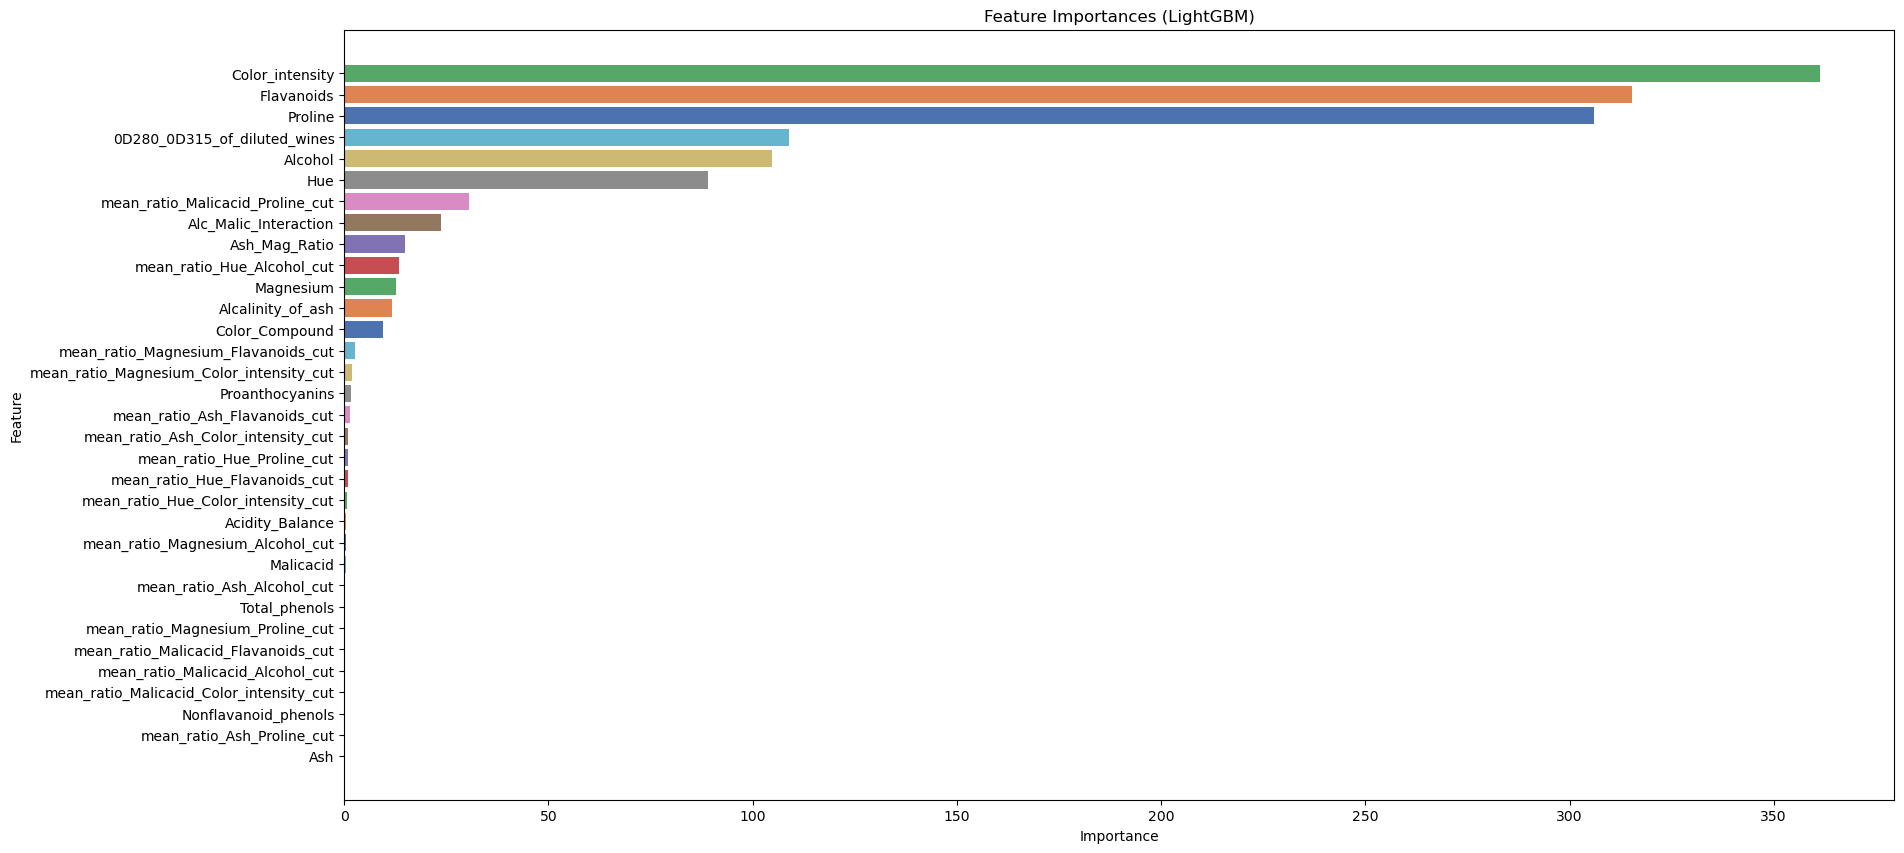

In [72]:
model = lgb.LGBMClassifier(verbose=-1, random_state = 42).fit(X_train, y_train)

plt.figure(figsize=(20, 10))
importances = model.booster_.feature_importance(importance_type='gain')
sorted_importances = sorted(importances)
sorted_indices = [list(importances).index(i) for i in sorted_importances]

palette = sns.color_palette("deep")

plt.barh(range(len(importances)), sorted_importances, color=palette)
plt.yticks(range(len(importances)), [X_train.columns[i] for i in sorted_indices])
plt.ylabel('Feature')
plt.xlabel('Importance')
plt.title('Feature Importances (LightGBM)')
plt.show()

In [ ]:
# I have implemented a simple lightgbm feature importace with type gain not split, but 
# since we have some correlated features sometimes lightgbm feature importance can be misleading

In [73]:
explainer = shap.Explainer(model)
shap_values_cat= explainer(X_test)

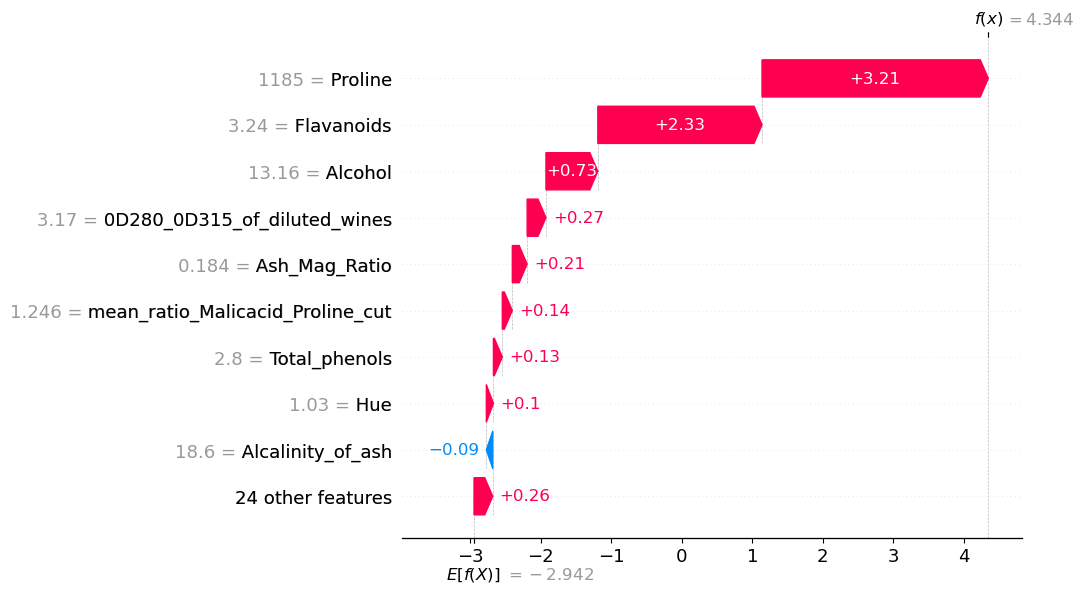

In [74]:
# waterfall plot for class 1
shap.plots.waterfall(shap_values_cat[0,:,0])

In [ ]:
# This waterfall plot created by Shap values and it is showing that our model predict class 1 thanks to
# our Proline and Flavanoids and alcohol columns, these features contributes the most

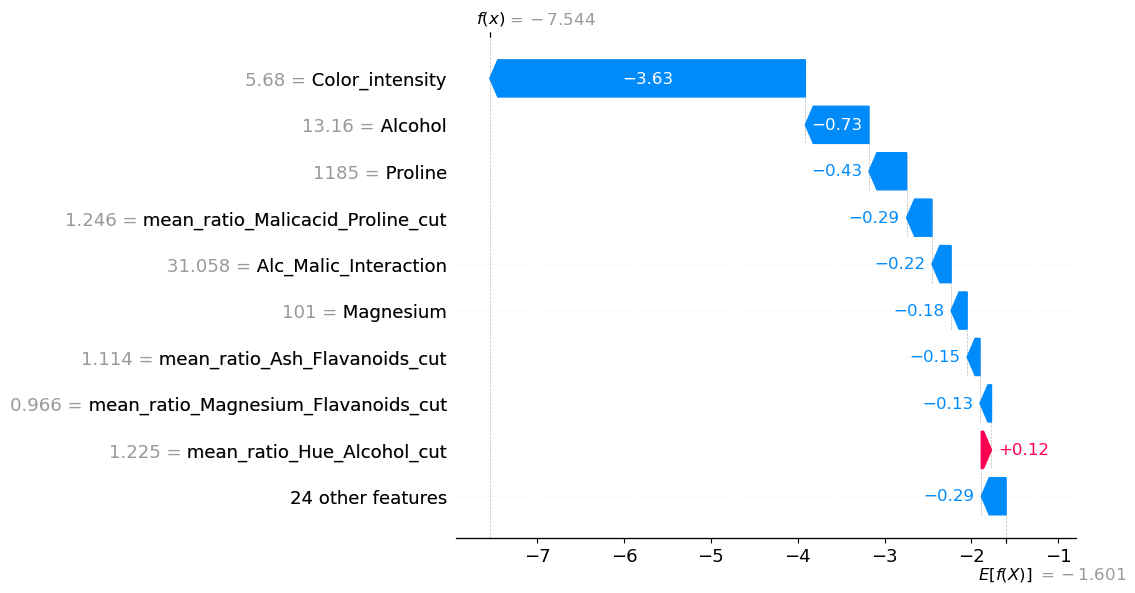

In [75]:
# waterfall plot for class 2
shap.plots.waterfall(shap_values_cat[0,:,1])

In [ ]:
# When the color intensity decreases the label most of the time turn 2 as we see in the EDA part
# This column contribute to label 2 a lot, when model make a prediction 

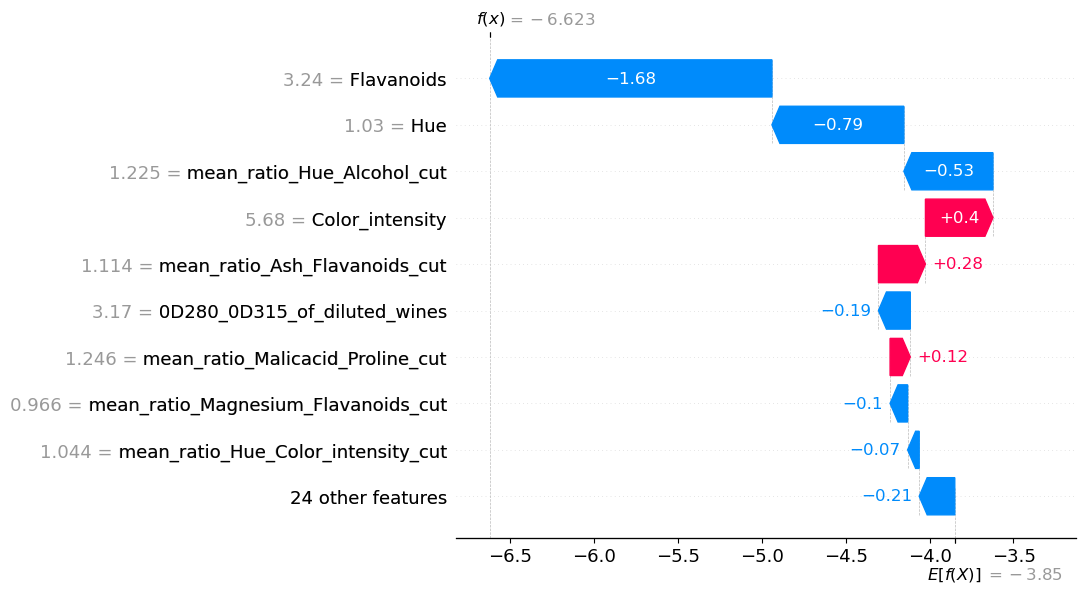

In [76]:
# waterfall plot for class 3
shap.plots.waterfall(shap_values_cat[0,:,2])

In [ ]:
# lower Flavanoids and HUE contribute the label 3, when model make prediction take these two column into account

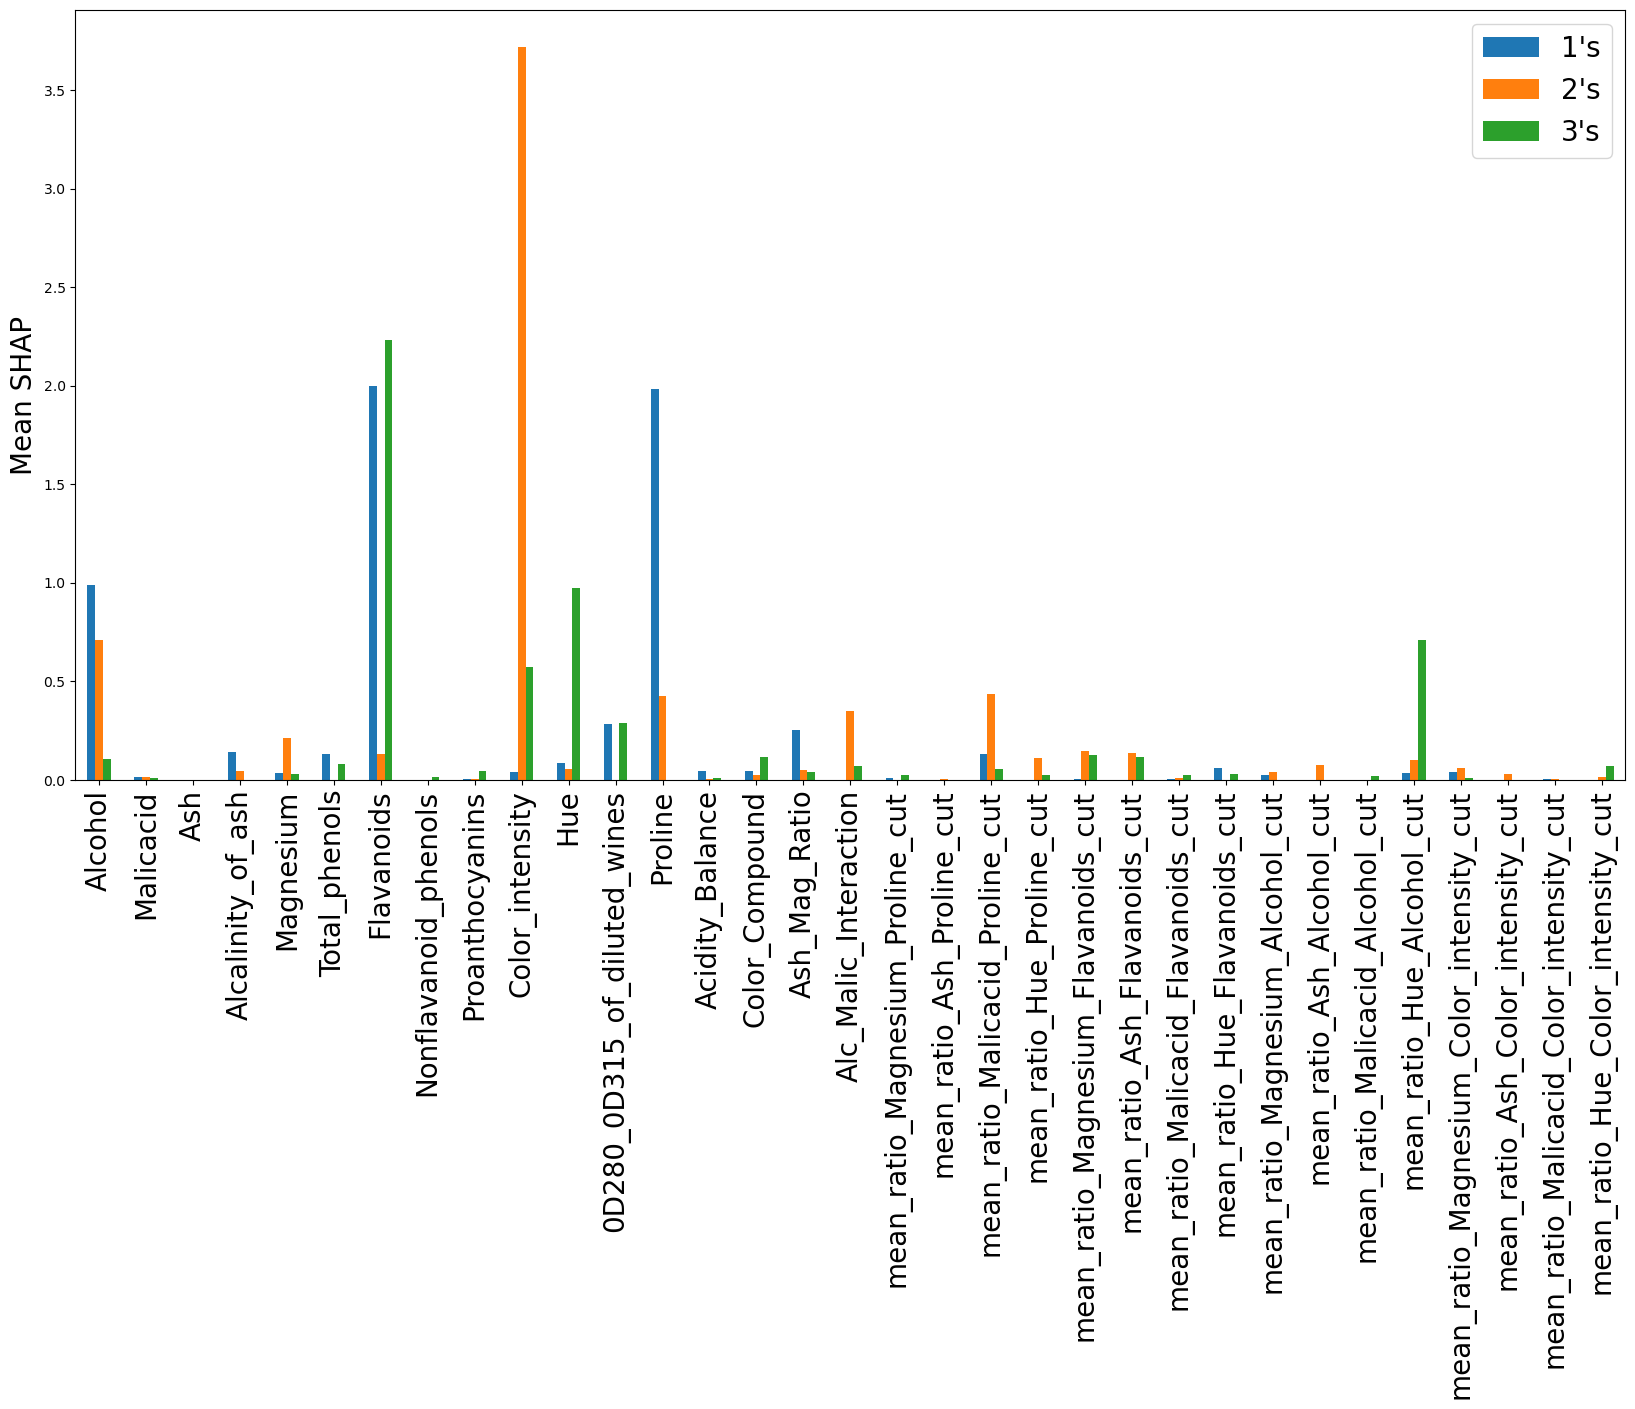

In [77]:
mean_1 = np.mean(np.abs(shap_values_cat.values[:,:,0]),axis=0)
mean_2 = np.mean(np.abs(shap_values_cat.values[:,:,1]),axis=0)
mean_3 = np.mean(np.abs(shap_values_cat.values[:,:,2]),axis=0)

mean_df = pd.DataFrame({"1's":mean_1,"2's":mean_2,"3's":mean_3})

fig, ax = plt.subplots(figsize=(20, 10))
mean_df.plot.bar(ax=ax)

ax.set_ylabel('Mean SHAP', size=20)
ax.set_xticklabels(X_train.columns, rotation=90, size=20)
ax.legend(fontsize=20)
plt.show()

# Check for the Baseline

In [34]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|███████████████████████████████████████████| 29/29 [00:01<00:00, 26.96it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 459
[LightGBM] [Info] Number of data points in the train set: 124, number of used features: 13
[LightGBM] [Info] Start training from score -1.106709
[LightGBM] [Info] Start training from score -0.908259
[LightGBM] [Info] Start training from score -1.323774
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

In [35]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,1.00,1.00,None,1.00,0.18
QuadraticDiscriminantAnalysis,1.00,1.00,None,1.00,0.02
ExtraTreesClassifier,1.00,1.00,None,1.00,0.13
GaussianNB,1.00,1.00,None,1.00,0.01
LinearSVC,0.98,0.98,None,0.98,0.01
BaggingClassifier,0.98,0.98,None,0.98,0.05
RidgeClassifierCV,0.98,0.98,None,0.98,0.02
RidgeClassifier,0.98,0.98,None,0.98,0.02
PassiveAggressiveClassifier,0.98,0.98,None,0.98,0.02


# Logistic Regression

In [36]:
%%time
# initally I also added pca to Pipeline steps but I decreased the performances I commented out
# I am using f1_macro evaluation metric since we classifying three different label

# for scaling I have used standart scaler, min max da denedim aynı sonuçları aldım 
# standar scaler aslında her kolonun ortalamasında standart sapmasını çıkıyor

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           #('pca', PCA(n_components = 1)),
                           ('classifier',   LogisticRegression(verbose = 0,random_state=42))])

params = [
         {'classifier__C' : np.arange(0.1, 3.0, 0.5), 
          'classifier__max_iter': [1000],
         'classifier__penalty': ['l2','l1'], 
         'classifier__solver' : ['liblinear','lbfgs', 'sag', 'saga']}
         ]

met_grid= ['accuracy','f1_macro'] 

cv = StratifiedKFold(n_splits=2)
log_grid = GridSearchCV(pipeline, param_grid = params, cv = cv, n_jobs = -1, scoring = met_grid , refit = 'f1_macro')
log_grid.fit(X_train, y_train)

CPU times: user 377 ms, sys: 203 ms, total: 580 ms
Wall time: 3.72 s


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Alcohol',
                                                                          'Malicacid',
                                                                          'Ash',
                                                                          'Alcalinity_of_ash',
                                                                          'Magnesium',
                                                                          'Total_phenols',
                                                                          'Flavanoids',
                                                                          'Nonflavanoid_phenols',
                                                                          'Proanthoc...
                                                                          'Color_intensity',
                                                                          'Hue',
                                                                          '0D280_0D315_of_diluted_wines',
                                                                          'Proline'])])),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid=[{'classifier__C': array([0.1, 0.6, 1.1, 1.6, 2.1, 2.6]),
                          'classifier__max_iter': [1000],
                          'classifier__penalty': ['l2', 'l1'],
                          'classifier__solver': ['liblinear', 'lbfgs', 'sag',
                                                 'saga']}],
             refit='f1_macro', scoring=['accuracy', 'f1_macro'])

In [37]:
print(log_grid.best_params_)

{'classifier__C': 1.1, 'classifier__max_iter': 1000, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}


In [38]:
# I need to see the cross validation score for all folds, so understand how my models generalize the training data
print('Accuracy Score:  ',np.nanmean(log_grid.cv_results_['mean_test_accuracy']).round(2))
print('='*25)
print('f1 score:        ' ,np.nanmean(log_grid.cv_results_['mean_test_f1_macro']).round(2))

Accuracy Score:   0.98
f1 score:         0.98


In [39]:
log_train_results = log_grid.predict(X_train)

print("Train Classification Report \n ", classification_report(y_train,log_train_results)) 
print("Train Confusion Matrix \n", confusion_matrix(y_train,log_train_results))   

Train Classification Report 
                precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        33

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124

Train Confusion Matrix 
 [[41  0  0]
 [ 0 50  0]
 [ 0  0 33]]


In [40]:
log_test_results = log_grid.predict(X_test)

print("Test Classification Report \n ", classification_report(y_test,log_test_results)) 
print("Test Confusion Matrix \n", confusion_matrix(y_test,log_test_results))   

Test Classification Report 
                precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.95      0.98        21
           3       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Test Confusion Matrix 
 [[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]


# RandomForest Classifier

In [41]:
%%time
# There is no need for the standard scaling the for the RandomForest or any other tree based ml algorithms
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('clf',RandomForestClassifier(random_state=42))])

param_grid = {  

    'clf__n_estimators' : [40,80,100],
    'clf__criterion' :['entropy'],
    'clf__min_samples_leaf' :[5,10,20],
    'clf__max_depth': [3, 5, None], 
    'clf__bootstrap': [True, False]
}                                            

met_grid= ['accuracy','f1_macro'] 

cv = StratifiedKFold(n_splits = 2)
grid_rdf = GridSearchCV(pipeline, param_grid = param_grid,cv = cv,n_jobs = -1, scoring = met_grid, refit = 'f1_macro')
grid_rdf.fit(X_train, y_train)

CPU times: user 555 ms, sys: 31.8 ms, total: 587 ms
Wall time: 3.61 s


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Alcohol',
                                                                          'Malicacid',
                                                                          'Ash',
                                                                          'Alcalinity_of_ash',
                                                                          'Magnesium',
                                                                          'Total_phenols',
                                                                          'Flavanoids',
                                                                          'Nonflavanoid_phenols',
                                                                          'Proanthocyanins',
                                                                          'Color_intensity',
                                                                          'Hue',
                                                                          '0D280_0D315_of_diluted_wines',
                                                                          'Proline'])])),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__bootstrap': [True, False],
                         'clf__criterion': ['entropy'],
                         'clf__max_depth': [3, 5, None],
                         'clf__min_samples_leaf': [5, 10, 20],
                         'clf__n_estimators': [40, 80, 100]},
             refit='f1_macro', scoring=['accuracy', 'f1_macro'])

In [42]:
print(grid_rdf.best_params_)

{'clf__bootstrap': True, 'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__min_samples_leaf': 5, 'clf__n_estimators': 80}


In [43]:
print('Accuracy Score:  ',np.nanmean(grid_rdf.cv_results_['mean_test_accuracy']).round(2))
print('='*25)
print('f1 score:        ' ,np.nanmean(grid_rdf.cv_results_['mean_test_f1_macro']).round(2))

Accuracy Score:   0.94
f1 score:         0.93


In [44]:
rdf_train_results = grid_rdf.predict(X_train)

print("Train Classification Report \n ", classification_report(y_train,rdf_train_results)) 
print("Train Confusion Matrix \n", confusion_matrix(y_train,rdf_train_results))   

Train Classification Report 
                precision    recall  f1-score   support

           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        33

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124

Train Confusion Matrix 
 [[41  0  0]
 [ 0 50  0]
 [ 0  0 33]]


In [45]:
rdf_test_results = grid_rdf.predict(X_test)

print("Test Classification Report \n ", classification_report(y_test,rdf_test_results)) 
print("Test Confusion Matrix \n", confusion_matrix(y_test,rdf_test_results)) 

Test Classification Report 
                precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.95      0.98        21
           3       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Test Confusion Matrix 
 [[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]


# XGBOOST Classifier

In [55]:
y_train = y_train - 1
y_test = y_test - 1 

In [56]:
%%time
pipeline = Pipeline(steps=[('preprocessor', preprocessor),('clf',XGBClassifier(random_state=42))])

param_grid = {  
    'clf__learning_rate' : [0.3, 0.5],
    'clf__n_estimators' : [30,50,75],
    'clf__max_depth' : [3,4,5],
    'clf__subsample' : [0.6,0.7], 
    'clf__min_child_weight' :[1,5,10],
    'clf__reg_alpha': [0.1, 1, 5],
    'clf__reg_lambda': [0.1, 1, 5],
    'clf__objective' : ['binary:logistic'],
    'clf__eval_metric' :['error'],
}                                   

met_grid= ['accuracy','f1_macro'] 

cv = StratifiedKFold(n_splits = 2)
grid_xgb = GridSearchCV(pipeline, param_grid = param_grid,cv = cv, n_jobs = -1, scoring = met_grid, refit = 'f1_macro')
grid_xgb.fit(X_train, y_train)

CPU times: user 4.7 s, sys: 142 ms, total: 4.84 s
Wall time: 12.9 s


GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Alcohol',
                                                                          'Malicacid',
                                                                          'Ash',
                                                                          'Alcalinity_of_ash',
                                                                          'Magnesium',
                                                                          'Total_phenols',
                                                                          'Flavanoids',
                                                                          'Nonflavanoid_phenols',
                                                                          'Proanthoc...
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'clf__eval_metric': ['error'],
                         'clf__learning_rate': [0.3, 0.5],
                         'clf__max_depth': [3, 4, 5],
                         'clf__min_child_weight': [1, 5, 10],
                         'clf__n_estimators': [30, 50, 75],
                         'clf__objective': ['binary:logistic'],
                         'clf__reg_alpha': [0.1, 1, 5],
                         'clf__reg_lambda': [0.1, 1, 5],
                         'clf__subsample': [0.6, 0.7]},
             refit='f1_macro', scoring=['accuracy', 'f1_macro'])

In [57]:
print(grid_xgb.best_params_)

{'clf__eval_metric': 'error', 'clf__learning_rate': 0.5, 'clf__max_depth': 3, 'clf__min_child_weight': 1, 'clf__n_estimators': 30, 'clf__objective': 'binary:logistic', 'clf__reg_alpha': 0.1, 'clf__reg_lambda': 1, 'clf__subsample': 0.6}


In [58]:
print('Accuracy Score:  ',np.nanmean(grid_xgb.cv_results_['mean_test_accuracy']).round(2))
print('='*25)
print('f1 score:        ' ,np.nanmean(grid_xgb.cv_results_['mean_test_f1_macro']).round(2))

Accuracy Score:   0.89
f1 score:         0.87


In [59]:
xgb_train_results = grid_xgb.predict(X_train)

print("Train Classification Report \n ", classification_report(y_train,xgb_train_results)) 
print("Train Confusion Matrix \n", confusion_matrix(y_train,xgb_train_results))   

Train Classification Report 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        33

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124

Train Confusion Matrix 
 [[41  0  0]
 [ 0 50  0]
 [ 0  0 33]]


In [62]:
xgb_test_results = grid_xgb.predict(X_test)

print("Test Classification Report \n ", classification_report(y_test,xgb_test_results)) 
print("Test Confusion Matrix \n", confusion_matrix(y_test,xgb_test_results)) 

Test Classification Report 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Test Confusion Matrix 
 [[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]
